In [69]:
# reff : https://www.kaggle.com/code/adhittio/jpx-stock-analysis-prediction/edit

In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
   

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
#!pip install -q hvplot
# !pip install --upgrade pandas
#!pip install --upgrade pandas-datareader
!pip install -q yfinance


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import pandas_datareader.data as web
import yfinance as yf

# For time stamps

from datetime import datetime


## TOP STOCK INDONESIA

In [72]:
start = datetime(2020,5,22)
end = datetime.now()  #datetime(2022, 1, 30)

#saham_BANK = ["USDT-USD"]  #"KAEF.JK"#"BBNI.JK" #"IDRUSD=X"
company=[]
i=0
for clist in ['TPIA','HMSP','UNVR','ASII','TLKM','INDF','BBCA','BMRI','BBRI','EMTK','BRIS']:
    #print(clist)
    B = web.DataReader([clist+'.JK'], 'yahoo', start, end)
    B=pd.DataFrame(B.to_records())
    B.columns=['Date','Adj Close','Close','High','Low','Open','Volume']
    B["company_name"]=clist
    if i ==0 :
        company=B    
    else:
        company=company.append(B)    
    i+=1
    
company=company.set_index('Date')

TPIA=company[company['company_name']=='TPIA']
HMSP=company[company['company_name']=='HMSP']
UNVR=company[company['company_name']=='UNVR']
ASII=company[company['company_name']=='ASII']
INDF=company[company['company_name']=='INDF']

BBCA=company[company['company_name']=='BBCA']
BBRI=company[company['company_name']=='BBRI']
BMRI=company[company['company_name']=='BMRI']

TLKM=company[company['company_name']=='TLKM']
EMTK=company[company['company_name']=='EMTK']
BRIS=company[company['company_name']=='BRIS']

company_list=[TPIA,HMSP,UNVR,ASII,TLKM,INDF,BBCA,BMRI,BBRI,EMTK,BRIS]
tech_list=['TPIA.JK','HMSP.JK','UNVR.JK','ASII.JK','TLKM.JK','INDF.JK','BBCA.JK','BMRI.JK','BBRI.JK','EMTK.JK','BRIS.JK']
company_name=['TPIA','HMSP','UNVR','ASII','TLKM','INDF','BBCA','BMRI','BBRI','EMTK','BRIS']

company

df=company.copy()

print(df.groupby('company_name').size())
display('df.describe()',df.describe())
df.info()

company_name
ASII    482
BBCA    482
BBRI    482
BMRI    482
BRIS    482
EMTK    482
HMSP    482
INDF    482
TLKM    482
TPIA    482
UNVR    482
dtype: int64


'df.describe()'

Adj Close         Close          High           Low          Open  \
count   5302.000000   5302.000000   5302.000000   5302.000000   5302.000000   
mean    4596.283851   4726.683932   4792.949363   4665.806811   4733.036406   
std     2412.715951   2469.230658   2491.950011   2443.873374   2471.850756   
min      290.000000    290.000000    300.000000    274.000000    290.000000   
25%     2471.390930   2500.000000   2572.500000   2430.000000   2500.000000   
50%     4634.642578   4840.000000   4920.000000   4760.000000   4840.000000   
75%     6388.413086   6575.000000   6650.000000   6500.000000   6590.000000   
max    11172.801758  11275.000000  11350.000000  11200.000000  11275.000000   

             Volume  
count  5.302000e+03  
mean   6.545888e+07  
std    8.806750e+07  
min    0.000000e+00  
25%    1.301695e+07  
50%    3.833240e+07  
75%    8.467258e+07  
max    1.318652e+09

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5302 entries, 2020-05-26 to 2022-05-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Adj Close     5302 non-null   float64
 1   Close         5302 non-null   float64
 2   High          5302 non-null   float64
 3   Low           5302 non-null   float64
 4   Open          5302 non-null   float64
 5   Volume        5302 non-null   float64
 6   company_name  5302 non-null   object 
dtypes: float64(6), object(1)
memory usage: 331.4+ KB


## CRYPTOCURRENCIES

In [6]:
start = datetime(2020,5,22)
end = datetime.now()  #datetime(2022, 1, 30)

company=[]
i=0
for clist in ['BTC','ETH','USDT','USDC','BNB','XRP','HEX','BUSD','ADA','SOL','DOGE']:
    #print(clist)
    B = web.DataReader([clist+'-USD'], 'yahoo', start, end)
    B=pd.DataFrame(B.to_records())
    B.columns=['Date','Adj Close','Close','High','Low','Open','Volume']
    B["company_name"]=clist
    if i ==0 :
        company=B    
    else:
        company=company.append(B)    
    i+=1
    
company=company.set_index('Date')

BTC=company[company['company_name']=='BTC']
ETH=company[company['company_name']=='ETH']
USDT=company[company['company_name']=='USDT']
USDC=company[company['company_name']=='USDC']
BNB=company[company['company_name']=='BNB']

XRP=company[company['company_name']=='XRP']
HEX=company[company['company_name']=='HEX']
BUSD=company[company['company_name']=='BUSD']

ADA=company[company['company_name']=='ADA']
SOL=company[company['company_name']=='SOL']
DOGE=company[company['company_name']=='DOGE']



company_list=[BTC,ETH,USDT,USDC,BNB,XRP,HEX,BUSD,ADA,SOL,DOGE]
tech_list=['BTC-USD','ETH-USD','USDT-USD','USDC-USD','BNB-USD','XRP-USD','HEX-USD','BUSD-USD','ADA-USD','SOL-USD','DOGE-USD']
company_name=['BTC','ETH','USDT','USDC','BNB','XRP','HEX','BUSD','ADA','SOL','DOGE']

company

df=company.copy()

print(df.groupby('company_name').size())
display('df.describe()',df.describe())
df.info()

company_name
ADA     730
BNB     730
BTC     730
BUSD    730
DOGE    730
ETH     730
HEX     730
SOL     730
USDC    730
USDT    730
XRP     730
dtype: int64


'df.describe()'

Adj Close         Close          High           Low          Open  \
count   8030.000000   8030.000000   8030.000000   8030.000000   8030.000000   
mean    3439.265897   3439.265897   3528.304451   3334.591933   3437.063279   
std    11362.355119  11362.355119  11654.909084  11026.368285  11361.254214   
min        0.002235      0.002235      0.002327      0.002090      0.002235   
25%        0.533875      0.533875      0.575937      0.497819      0.533812   
50%        1.000484      1.000484      1.001990      0.999800      1.000495   
75%      162.367748    162.367748    170.995872    152.379570    161.535519   
max    67566.828125  67566.828125  68789.625000  66382.062500  67549.734375   

             Volume  
count  8.030000e+03  
mean   3.372489e+10  
std    1.272623e+12  
min    6.520200e+05  
25%    5.067937e+08  
50%    2.612109e+09  
75%    1.463677e+10  
max    8.325207e+13

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8030 entries, 2020-05-22 to 2022-05-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Adj Close     8030 non-null   float64
 1   Close         8030 non-null   float64
 2   High          8030 non-null   float64
 3   Low           8030 non-null   float64
 4   Open          8030 non-null   float64
 5   Volume        8030 non-null   int64  
 6   company_name  8030 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 501.9+ KB


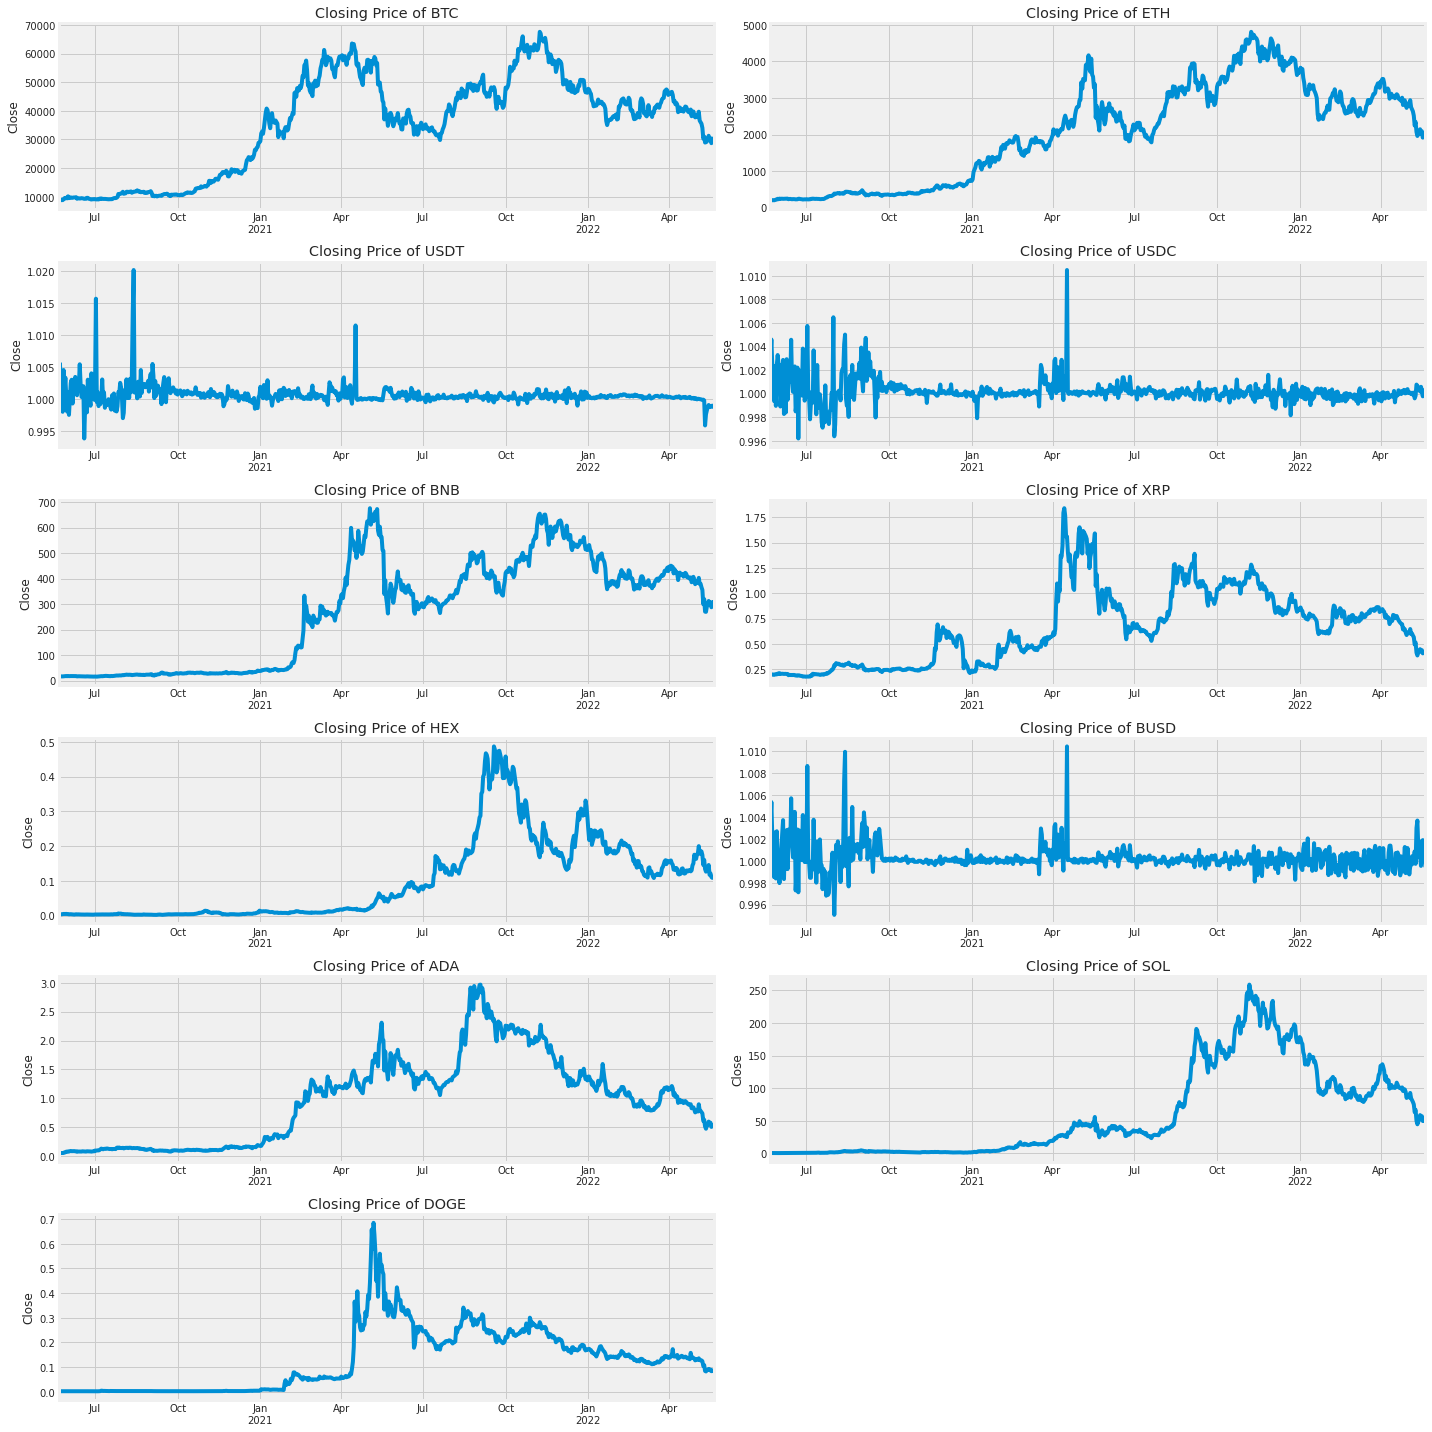

In [15]:
# Let's see a historical view of the closing price

plt.figure(figsize=(20, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    #print(company)
    plt.subplot(6, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

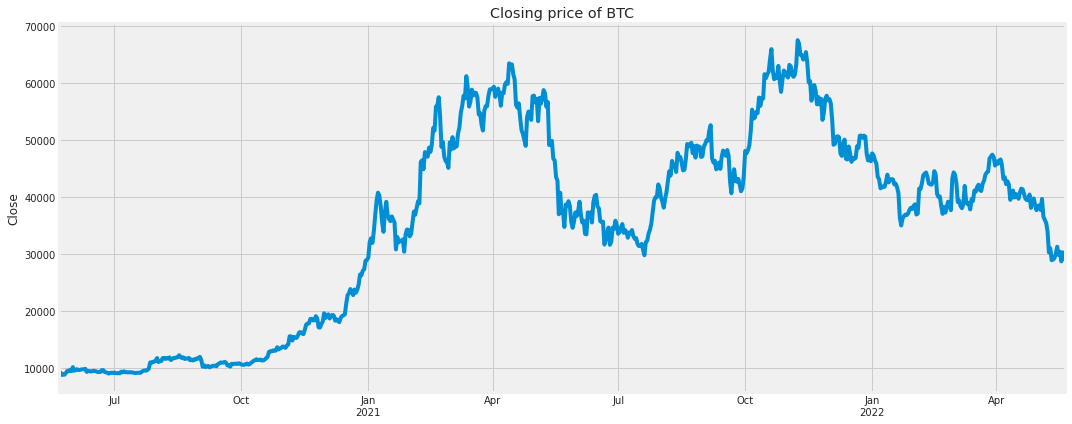

In [17]:
# Let's see a historical view of the closing price

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

#for i, company in enumerate(company_list, 1):
#plt.subplot(2, 2, i)
BTC['Close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title("Closing price of BTC")
    
plt.tight_layout()

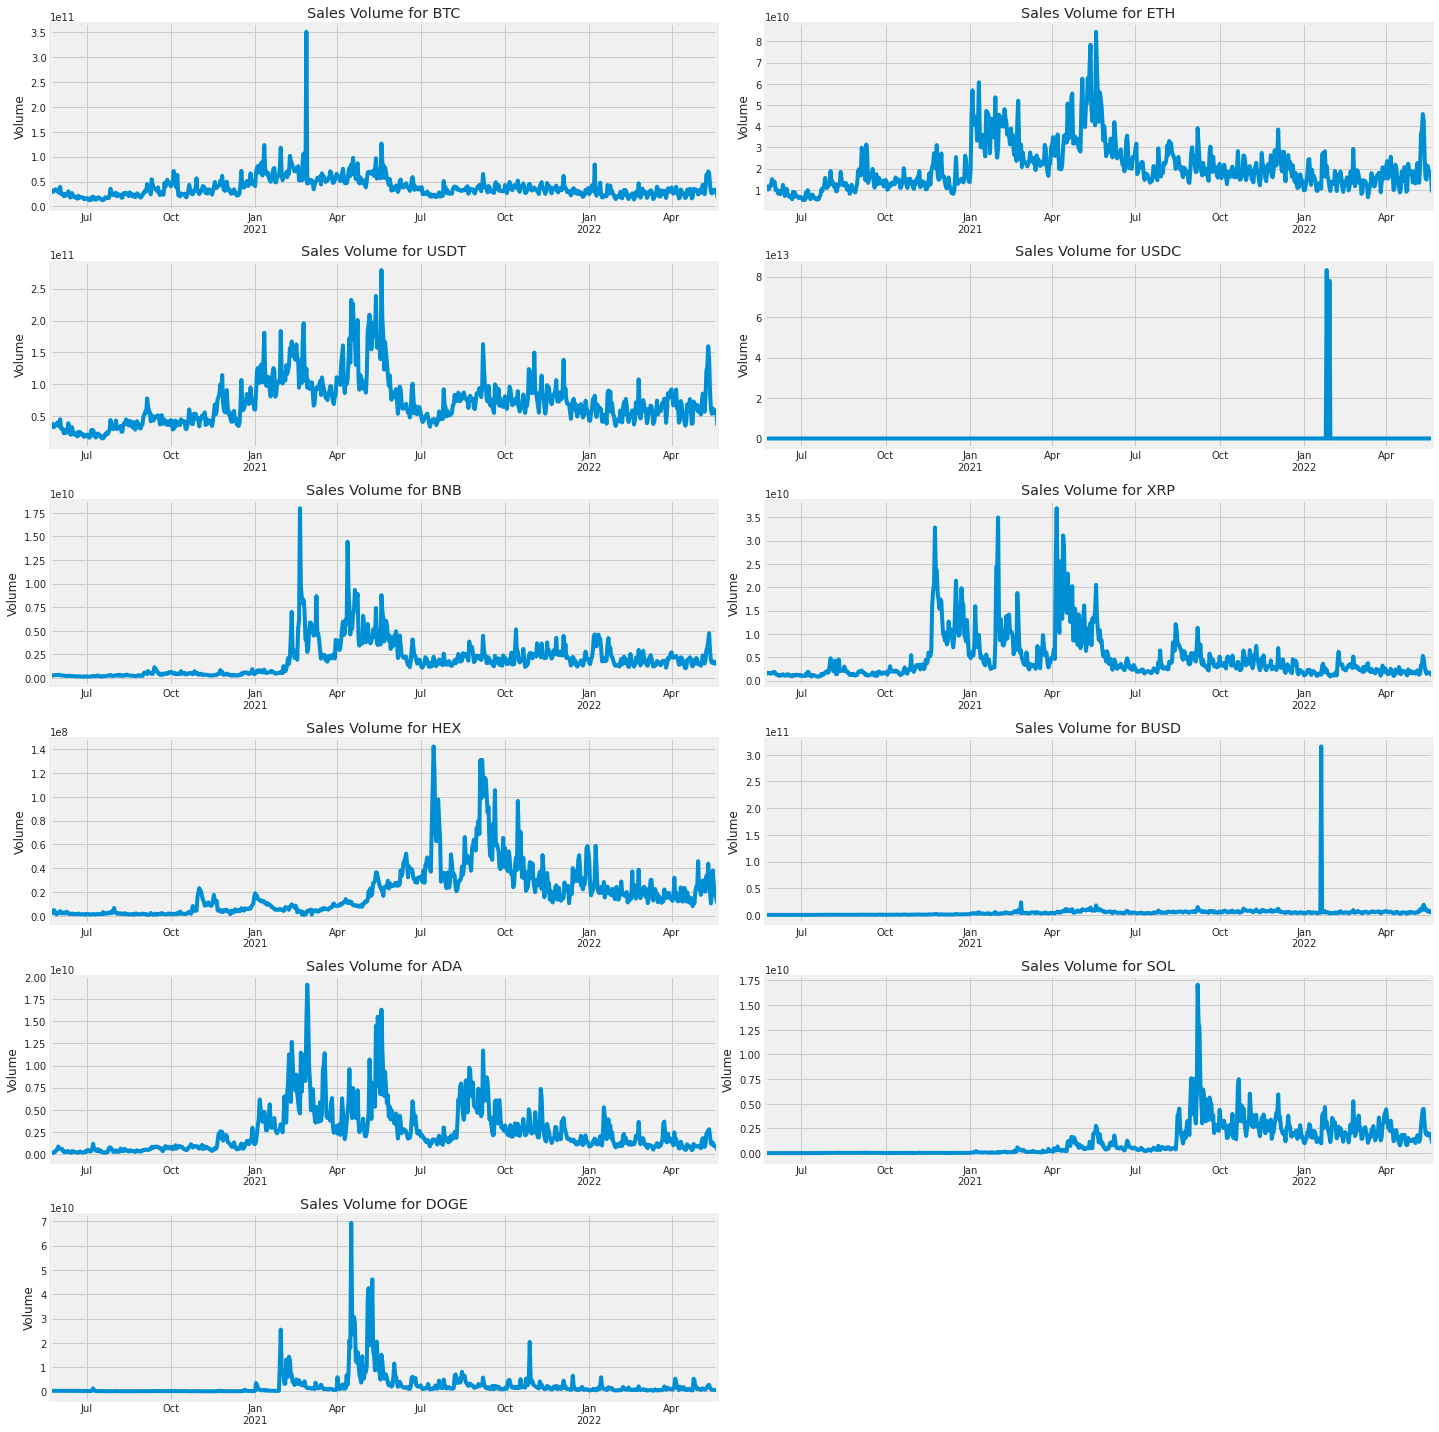

In [19]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(20, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(6, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [20]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()
        #f"{str(company)}_MA"[column_name] = f"{str(company)}_MA"['Close'].rolling(ma).mean()

In [21]:
print(BTC.columns)
print(ETH.columns)


Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')
Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


Now let's go ahead and plot all the additional Moving Averages

In [22]:
BTC

Adj Close         Close          High           Low  \
Date                                                                 
2020-05-22   9182.577148   9182.577148   9232.936523   9008.638672   
2020-05-23   9209.287109   9209.287109   9302.501953   9118.108398   
2020-05-24   8790.368164   8790.368164   9288.404297   8787.250977   
2020-05-25   8906.934570   8906.934570   8951.005859   8719.667969   
2020-05-26   8835.052734   8835.052734   8991.967773   8757.293945   
...                  ...           ...           ...           ...   
2022-05-17  30425.857422  30425.857422  30694.490234  29570.302734   
2022-05-18  28720.271484  28720.271484  30618.716797  28720.271484   
2022-05-19  30314.333984  30314.333984  30430.751953  28708.955078   
2022-05-20  29200.740234  29200.740234  30664.976562  28793.605469   
2022-05-21  29344.583984  29344.583984  29588.869141  29062.800781   

                    Open       Volume company_name  MA for 10 days  \
Date                                                                 
2020-05-22   9080.334961  29810773699          BTC             NaN   
2020-05-23   9185.062500  27727866812          BTC             NaN   
2020-05-24   9212.283203  32518803300          BTC             NaN   
2020-05-25   8786.107422  31288157264          BTC             NaN   
2020-05-26   8909.585938  29584186947          BTC             NaN   
...                  ...          ...          ...             ...   
2022-05-17  29862.408203  29101473475          BTC    30434.149023   
2022-05-18  30424.478516  31285268319          BTC    29900.249609   
2022-05-19  28720.359375  33773447707          BTC    29901.987695   
2022-05-20  30311.119141  30749382605          BTC    29719.771094   
2022-05-21  29168.476562  17417070592          BTC    29760.593945   

            MA for 20 days  MA for 50 days  
Date                                        
2020-05-22             NaN             NaN  
2020-05-23             NaN             NaN  
2020-05-24             NaN             NaN  
2020-05-25             NaN             NaN  
2020-05-26             NaN             NaN  
...                    ...             ...  
2022-05-17    34150.263965    39000.668242  
2022-05-18    33597.586133    38625.759063  
2022-05-19    33182.811621    38290.792461  
2022-05-20    32757.104883    37964.033750  
2022-05-21    32300.879395    37625.292539  

[730 rows x 10 columns]

company_name
ADA     [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
BNB     [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
BTC     [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
BUSD    [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
DOGE    [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
ETH     [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
HEX     [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
SOL     [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
USDC    [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
USDT    [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
XRP     [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
dtype: object

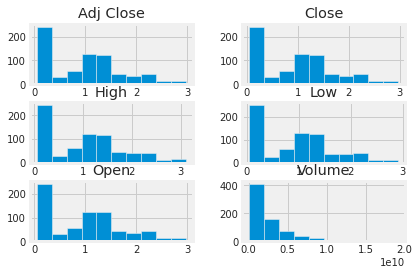

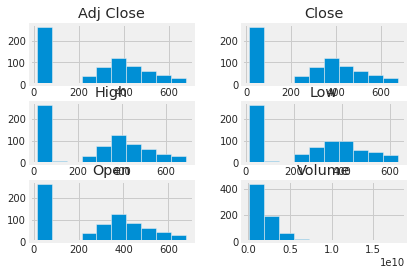

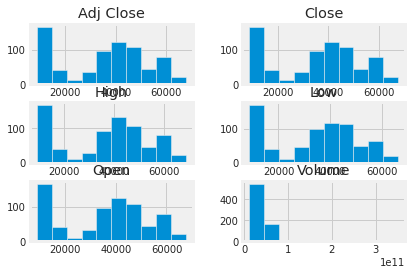

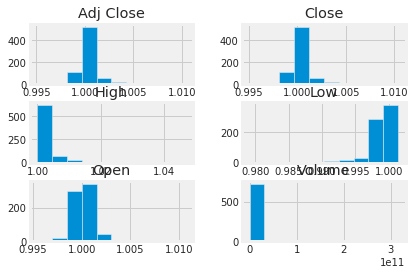

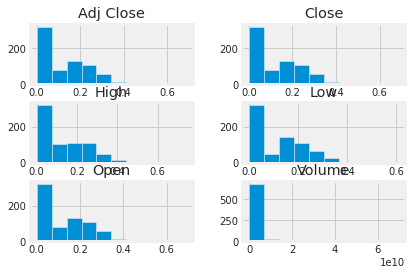

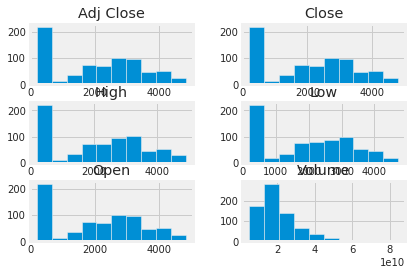

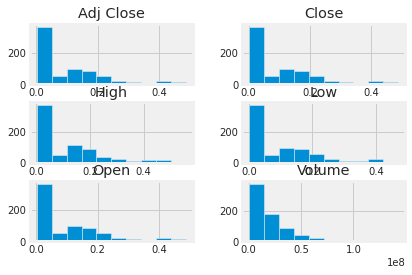

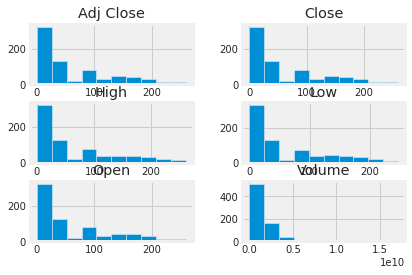

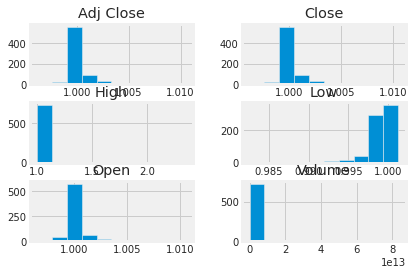

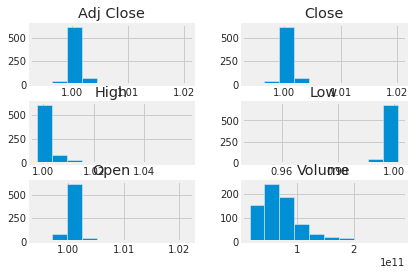

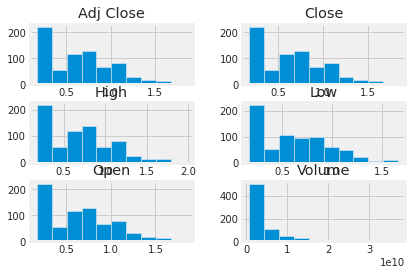

In [23]:
df.groupby("company_name").hist()

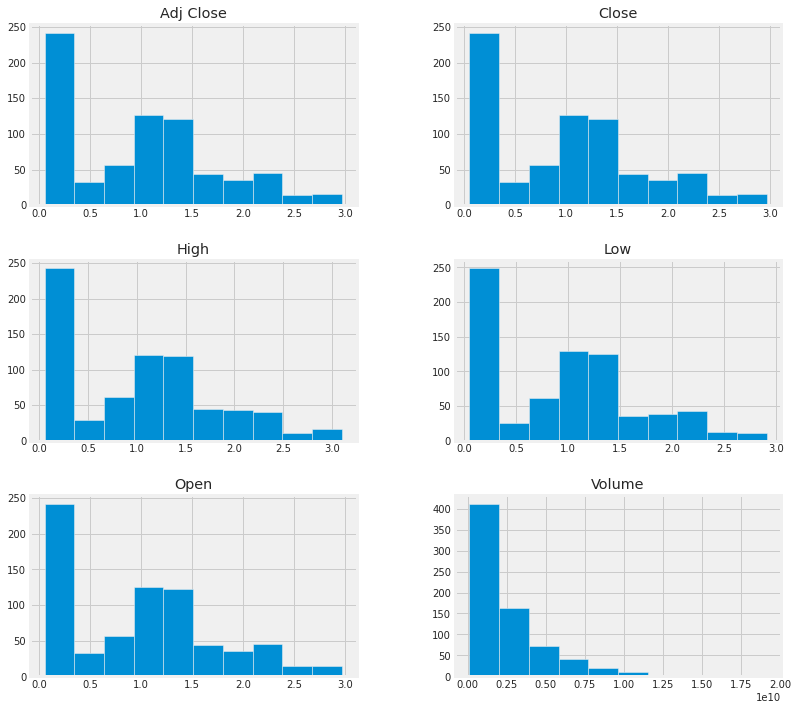

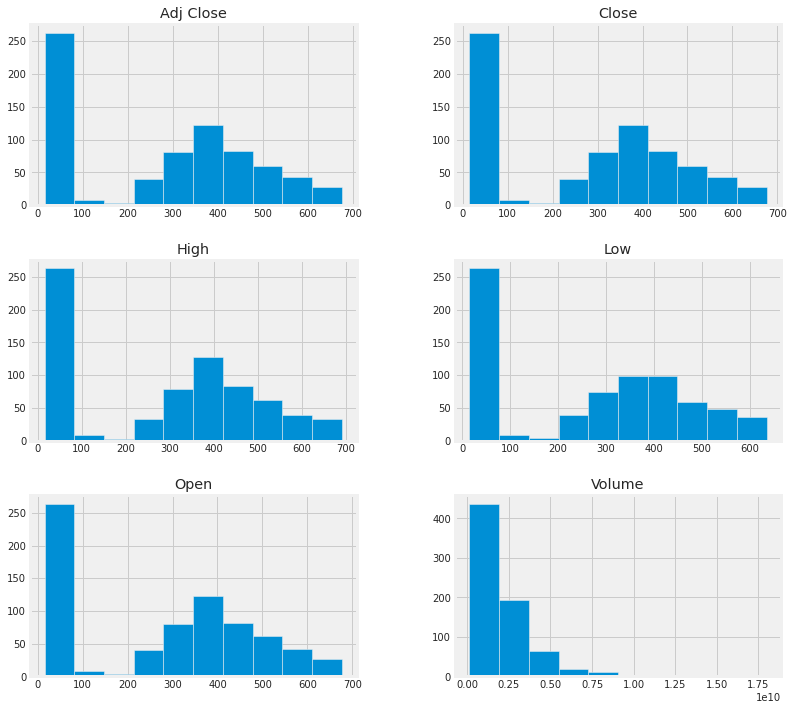

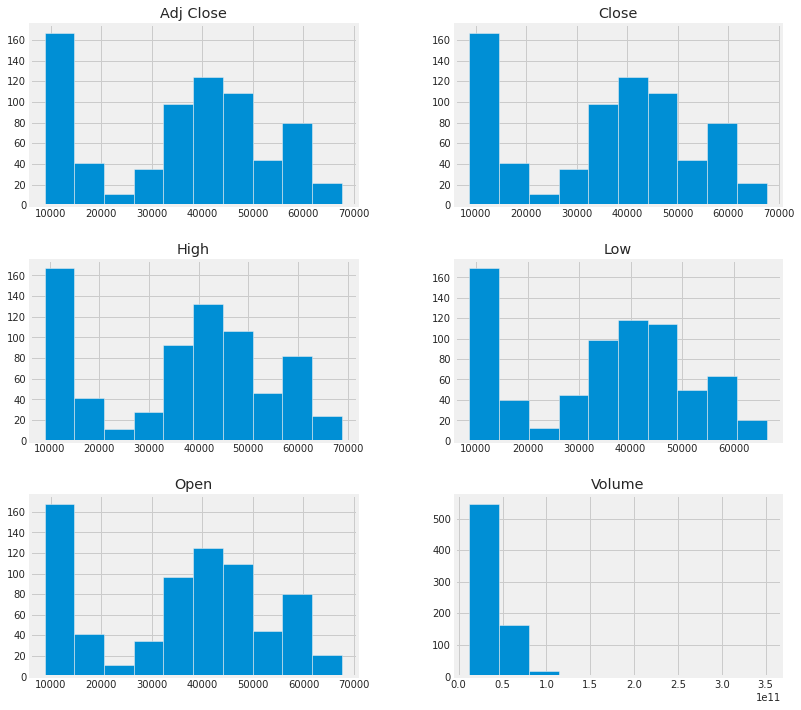

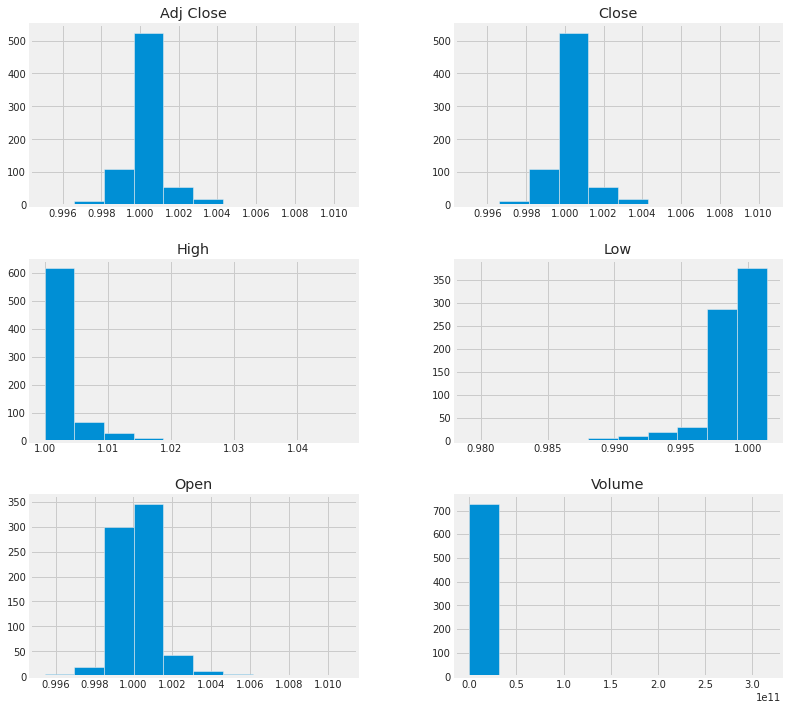

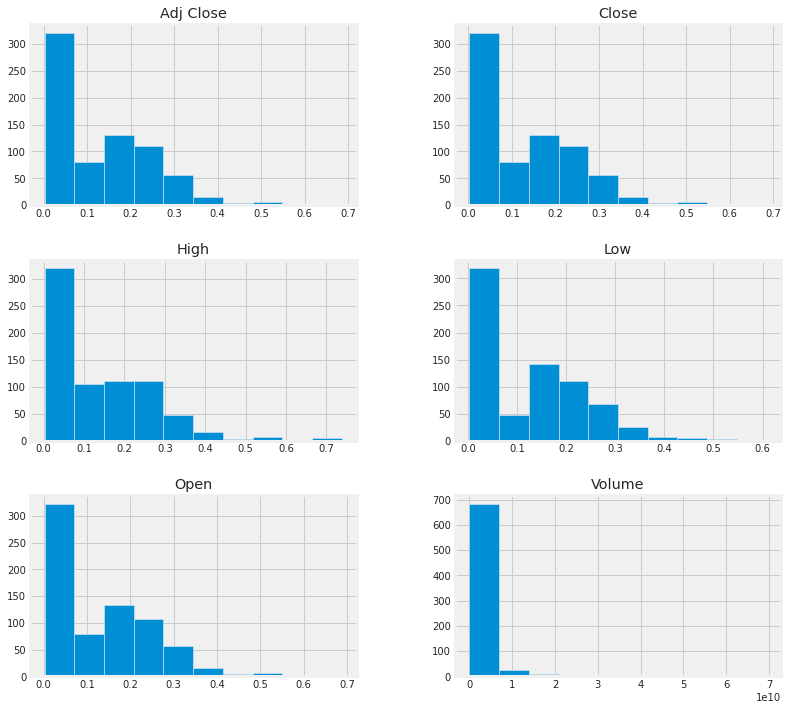

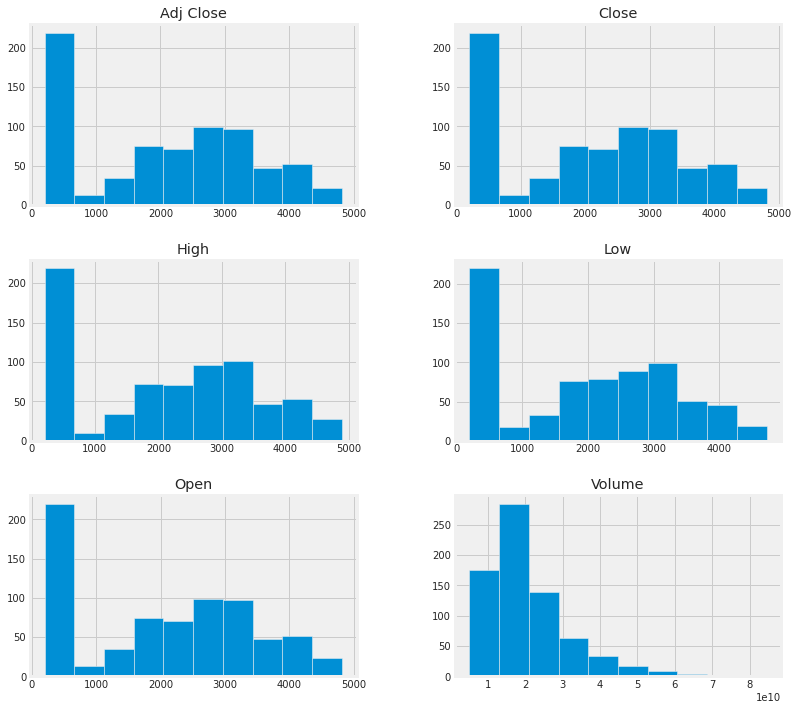

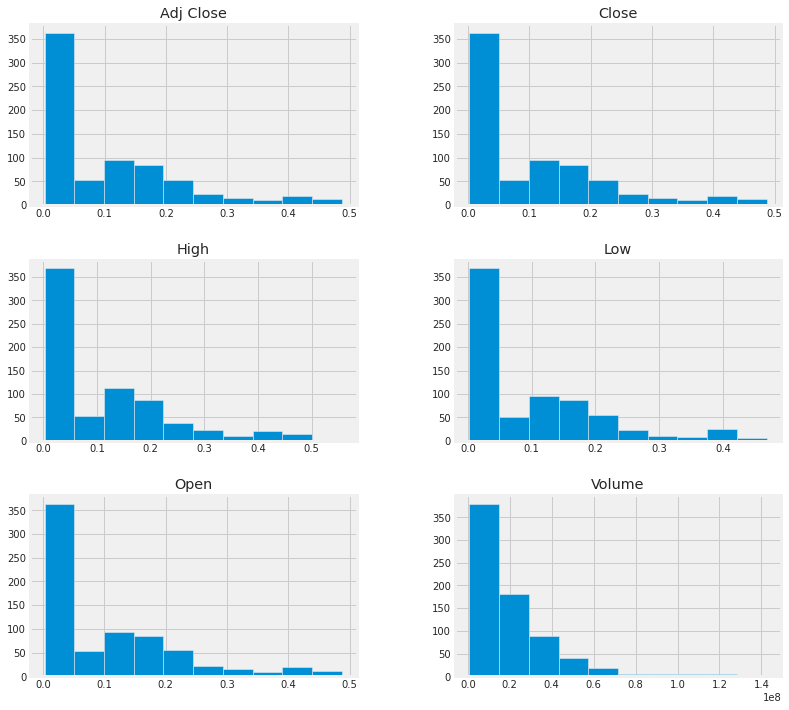

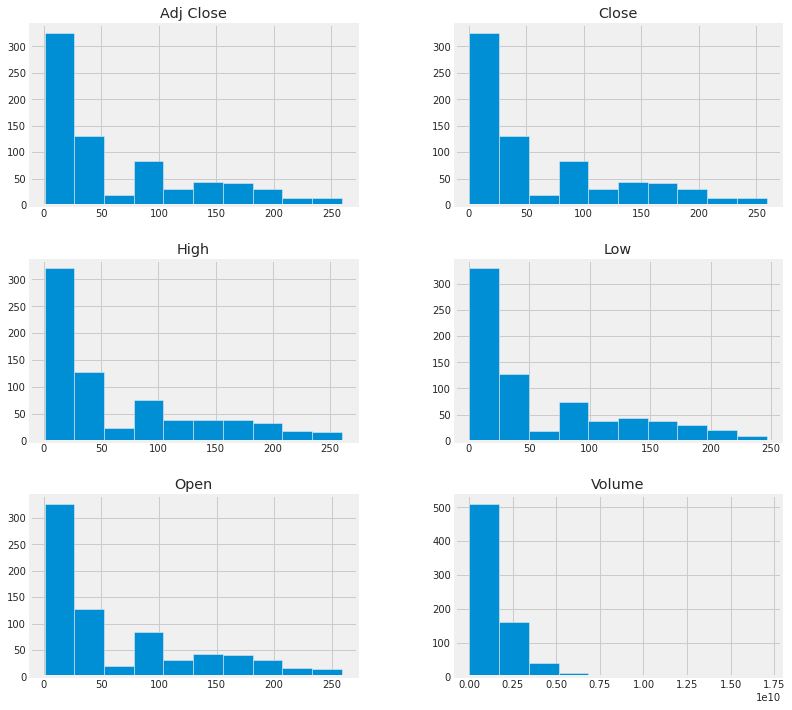

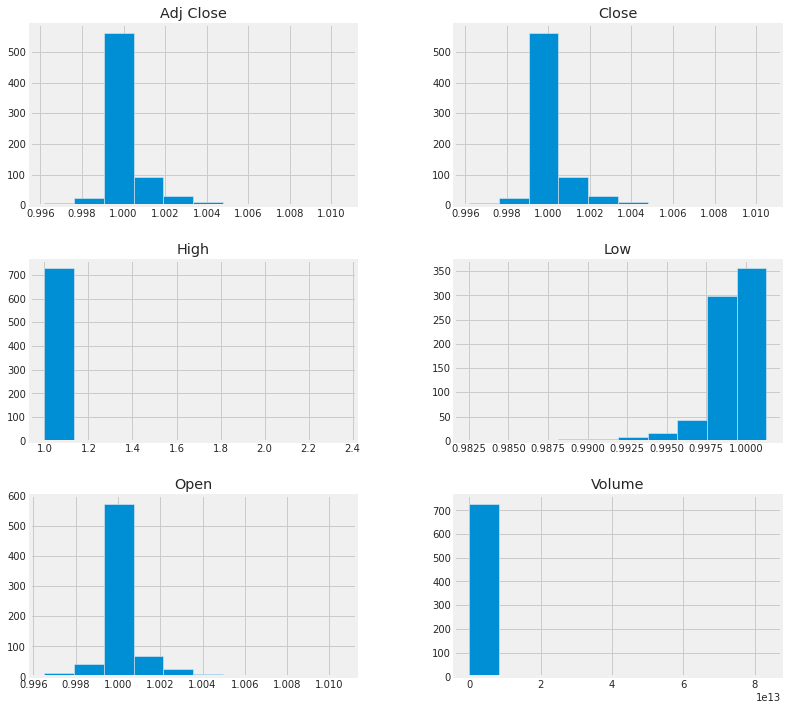

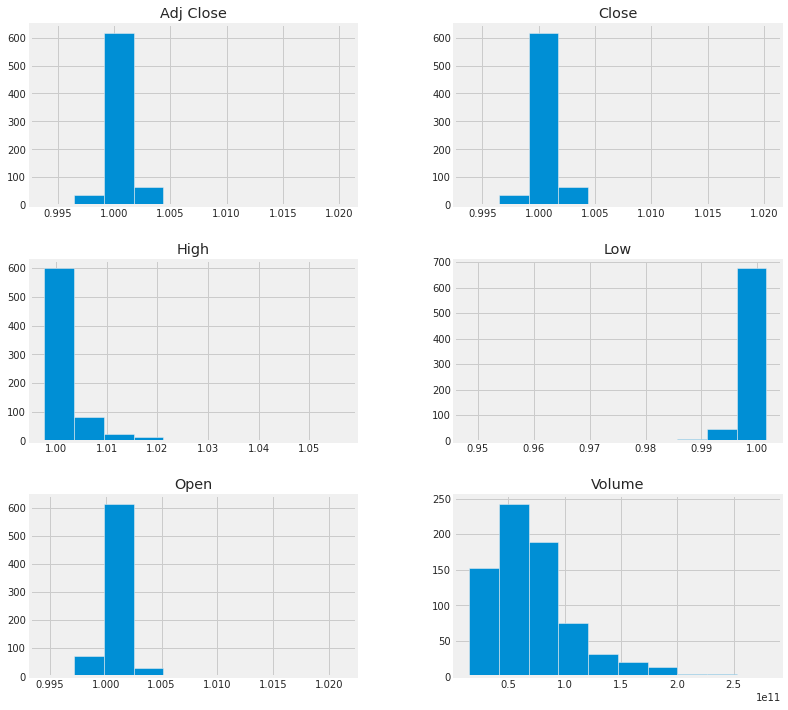

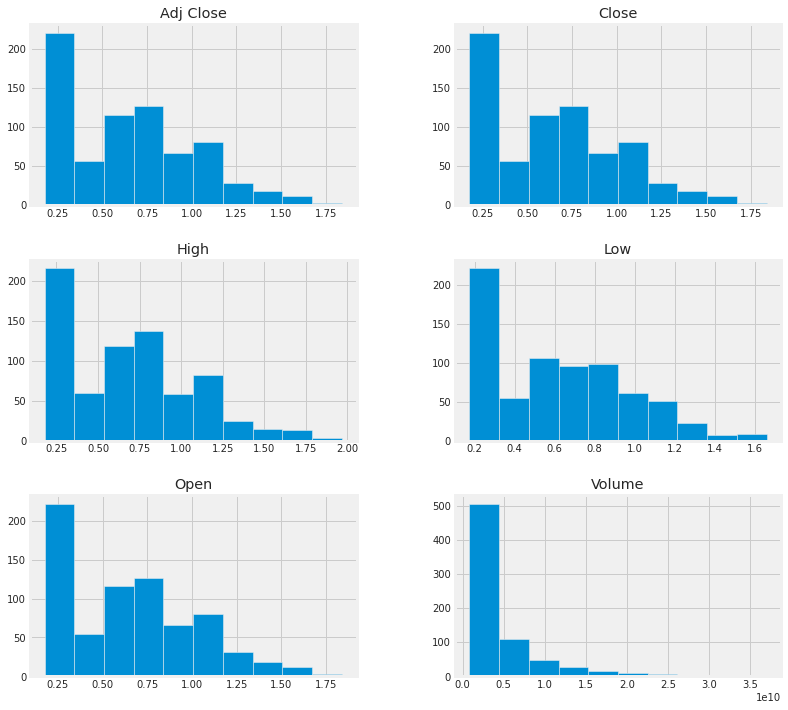

In [26]:
df.groupby("company_name").hist(figsize=(12, 12));   

IndexError: list index out of range

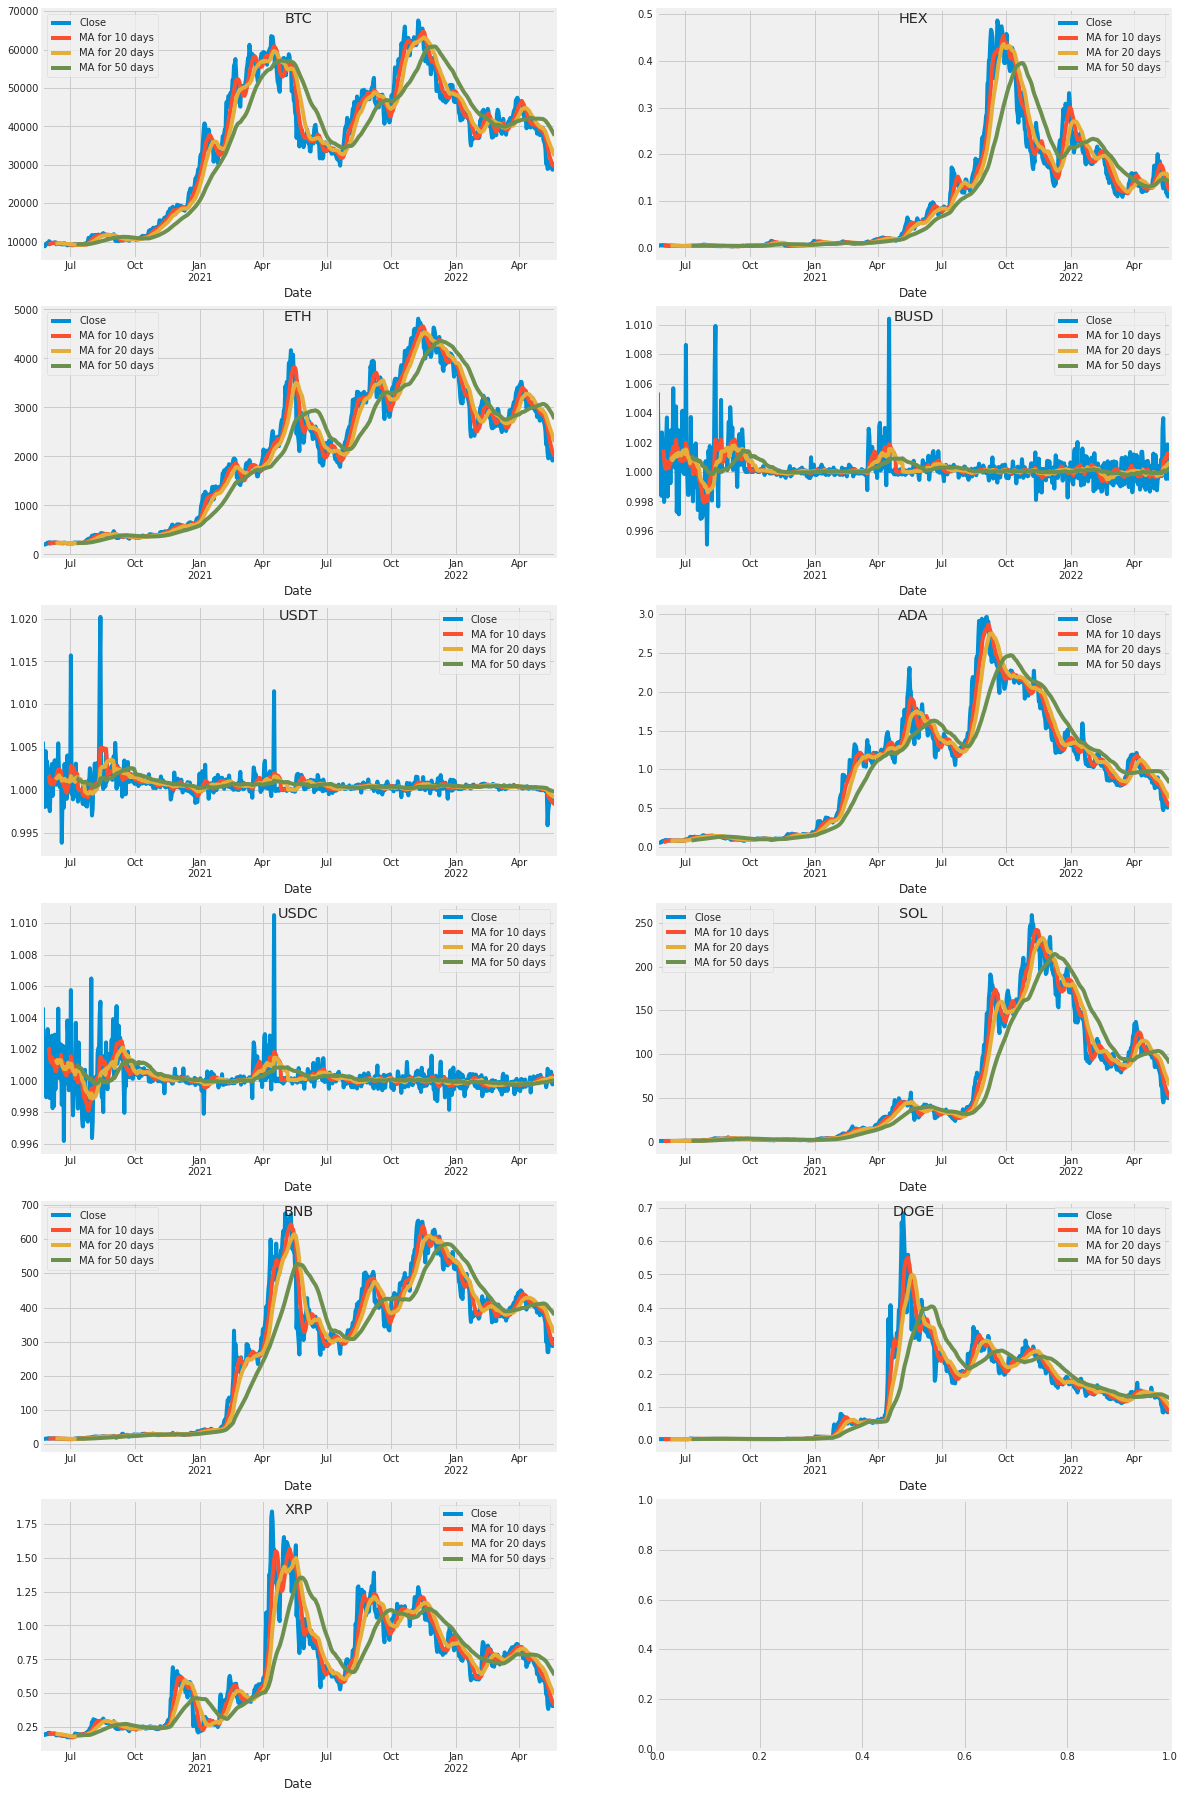

In [84]:
#company_list=[BTC,ETH,USDT,USDC,BNB,XRP,HEX,BUSD,ADA,SOL,DOGE]
#tech_list=['BTC-USD','ETH-USD','USDT-USD','USDC-USD','BNB-USD','XRP-USD','HEX-USD','BUSD-USD','ADA-USD','SOL-USD','DOGE-USD']
#company_name=['BTC','ETH','USDT','USDC','BNB','XRP','HEX','BUSD','ADA','SOL','DOGE']

fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_figheight(32)
fig.set_figwidth(18)

for i in range (0,6):
    #plt.subplot(6, 2, i)
    company_list[i][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i,0])
    axes[i,0].set_title(company_name[i], y= 1.0, pad=-14)
    
    company_list[i+6][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i,1])
    axes[i,1].set_title(company_name[i+6], y= 1.0, pad=-14)
    
fig.tight_layout()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

IndexError: list index out of range

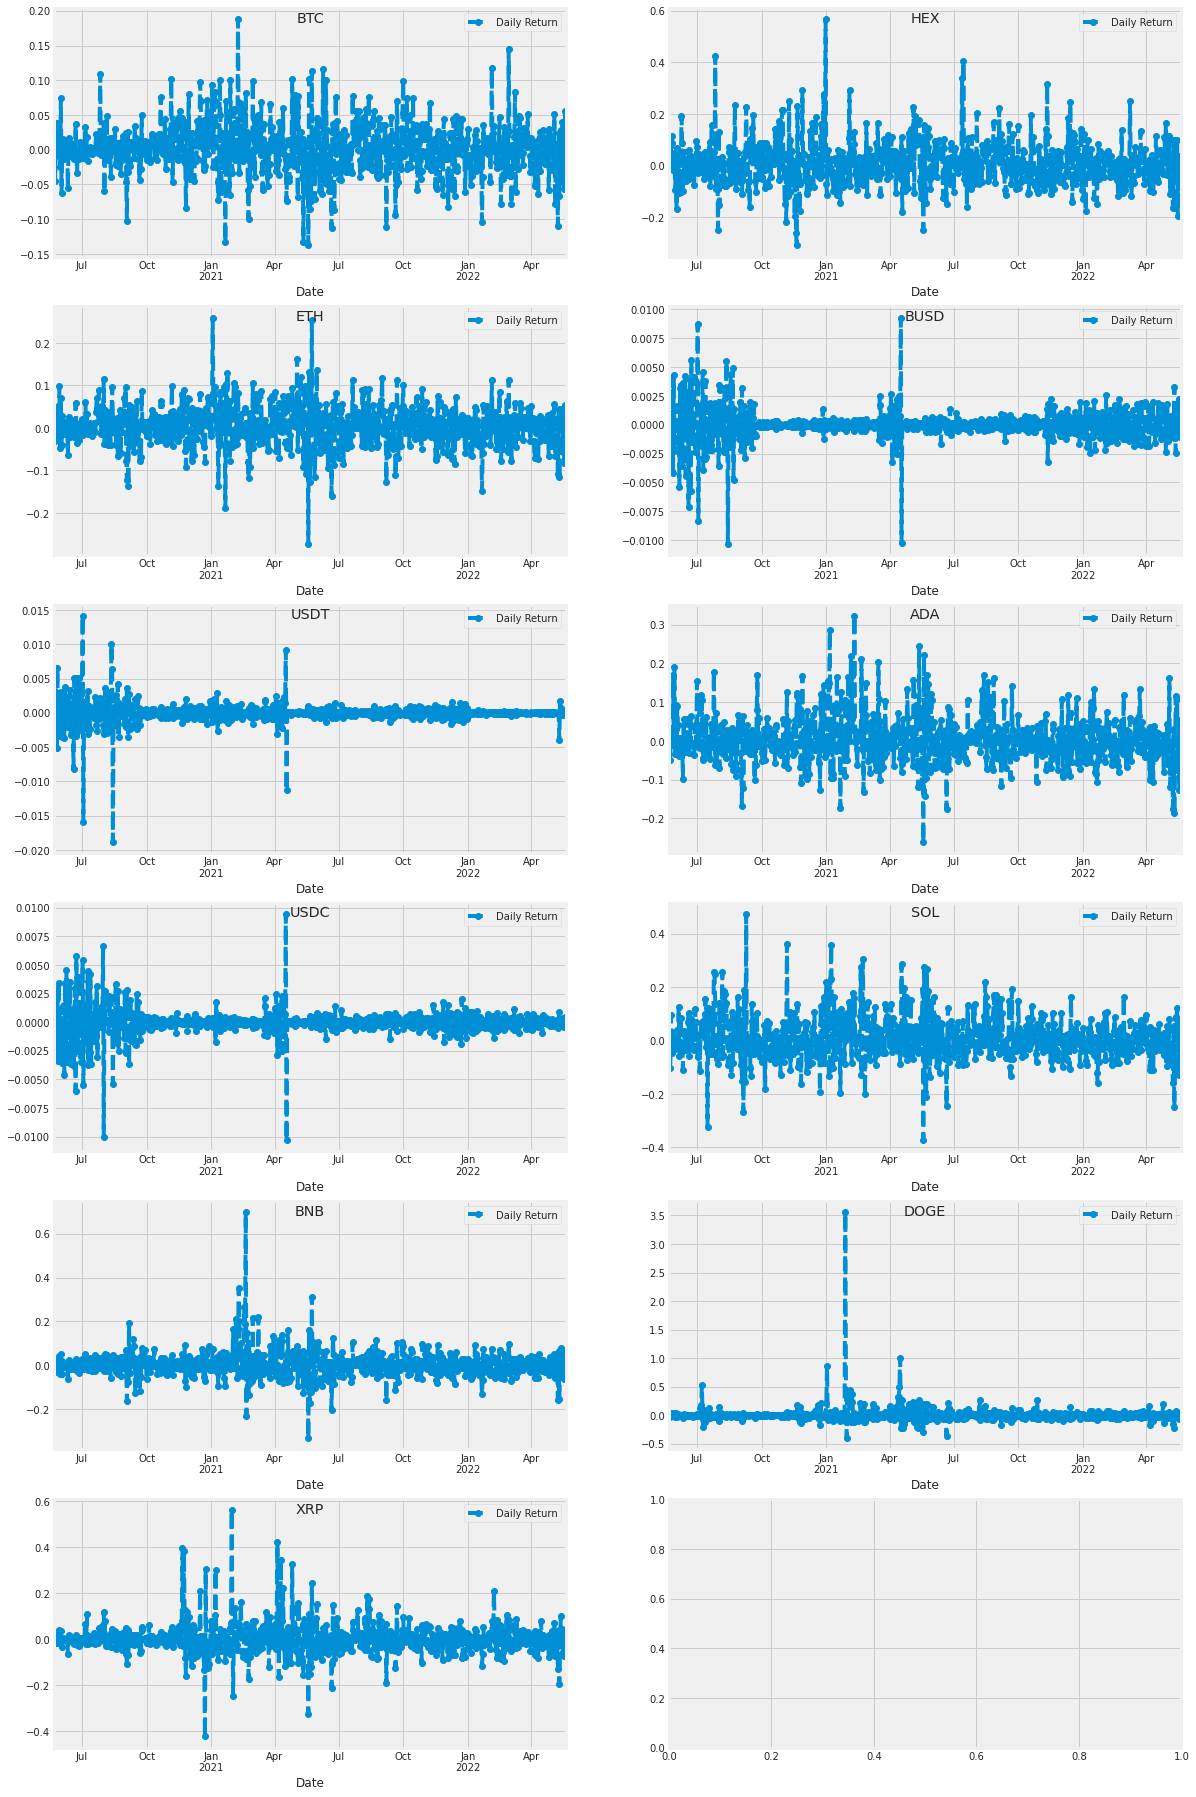

In [86]:
#company_list=[BTC,ETH,USDT,USDC,BNB,XRP,HEX,BUSD,ADA,SOL,DOGE]
#tech_list=['BTC-USD','ETH-USD','USDT-USD','USDC-USD','BNB-USD','XRP-USD','HEX-USD','BUSD-USD','ADA-USD','SOL-USD','DOGE-USD']
#company_name=['BTC','ETH','USDT','USDC','BNB','XRP','HEX','BUSD','ADA','SOL','DOGE']

# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

fig, axes = plt.subplots(nrows=6, ncols=2)
fig.set_figheight(32)
fig.set_figwidth(18)

for i in range (0,6):
   
    company_list[i]['Daily Return'].plot(ax=axes[i,0], legend=True, linestyle='--', marker='o')   
    #company_list[i]['Daily Return'].plot(ax=axes[i,0])    
    axes[i,0].set_title(company_name[i], y= 1.0, pad=-14)
    
    company_list[i+6]['Daily Return'].plot(ax=axes[i,1], legend=True, linestyle='--', marker='o')  
    #company_list[i]['Daily Return'].plot(ax=axes[i,0])    
    axes[i,1].set_title(company_name[i+6], y= 1.0, pad=-14)
    
fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

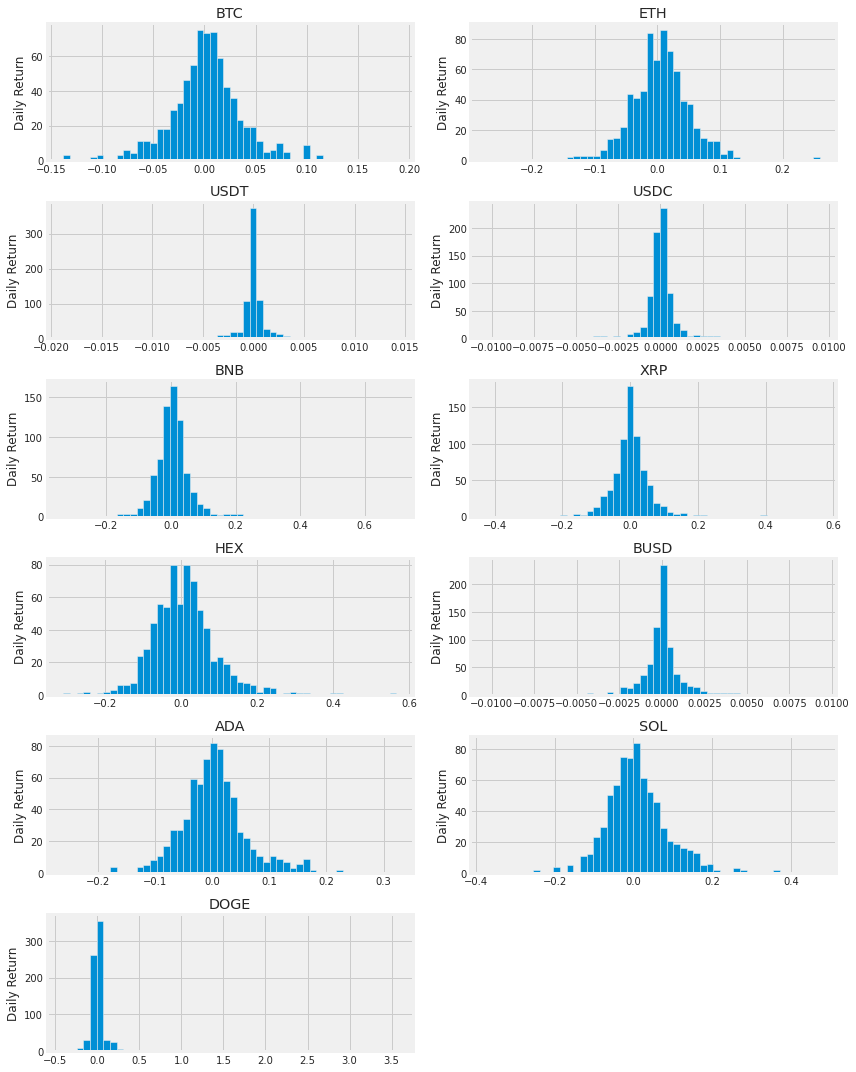

In [91]:
plt.figure(figsize=(12, 15))

for i, company in enumerate(company_list, 1):
    plt.subplot(6, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i-1]}')
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [93]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Close']
closing_df.columns=company_name

# Let's take a quick look
closing_df.head() 

BTC         ETH      USDT      USDC        BNB       XRP  \
Date                                                                           
2020-05-22  9182.577148  207.169189  1.002287  1.003144  16.639593  0.200343   
2020-05-23  9209.287109  208.694397  1.005538  1.004600  16.588194  0.198856   
2020-05-24  8790.368164  202.370346  1.001089  1.002402  16.083439  0.195431   
2020-05-25  8906.934570  205.319748  1.003199  1.002305  16.400908  0.197327   
2020-05-26  8835.052734  201.902313  0.998008  0.999371  16.212547  0.193975   

                 HEX      BUSD       ADA       SOL      DOGE  
Date                                                          
2020-05-22  0.003668  1.003469  0.055833  0.638875  0.002533  
2020-05-23  0.003767  1.005347  0.055322  0.613031  0.002544  
2020-05-24  0.003885  1.002182  0.052641  0.549053  0.002458  
2020-05-25  0.004025  1.002561  0.054011  0.600857  0.002540  
2020-05-26  0.004489  0.998511  0.053430  0.573307  0.002486

Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [94]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets #.head()

BTC       ETH      USDT      USDC       BNB       XRP  \
Date                                                                     
2020-05-22       NaN       NaN       NaN       NaN       NaN       NaN   
2020-05-23  0.002909  0.007362  0.003244  0.001451 -0.003089 -0.007422   
2020-05-24 -0.045489 -0.030303 -0.004425 -0.002188 -0.030429 -0.017224   
2020-05-25  0.013261  0.014574  0.002108 -0.000097  0.019739  0.009702   
2020-05-26 -0.008070 -0.016644 -0.005174 -0.002927 -0.011485 -0.016987   
...              ...       ...       ...       ...       ...       ...   
2022-05-17  0.018851  0.033461  0.000130 -0.000362  0.027723  0.035797   
2022-05-18 -0.056057 -0.083119 -0.000107 -0.000448 -0.060545 -0.071882   
2022-05-19  0.055503  0.053051  0.000169  0.000498  0.067328  0.034001   
2022-05-20 -0.036735 -0.028251 -0.000153 -0.000362 -0.014447 -0.021046   
2022-05-21  0.009553  0.008435 -0.000001  0.000351  0.034714  0.011103   

                 HEX      BUSD       ADA       SOL      DOGE  
Date                                                          
2020-05-22       NaN       NaN       NaN       NaN       NaN  
2020-05-23  0.026990  0.001872 -0.009152 -0.040452  0.004343  
2020-05-24  0.031325 -0.003148 -0.048462 -0.104363 -0.033805  
2020-05-25  0.036036  0.000378  0.026025  0.094352  0.033360  
2020-05-26  0.115279 -0.004040 -0.010757 -0.045851 -0.021260  
...              ...       ...       ...       ...       ...  
2022-05-17  0.035630  0.002270  0.038370  0.064854  0.027003  
2022-05-18 -0.084278  0.000078 -0.125350 -0.129004 -0.072761  
2022-05-19 -0.021568 -0.001038  0.054797  0.049396  0.036749  
2022-05-20  0.003859 -0.000604 -0.028902 -0.051240 -0.031664  
2022-05-21  0.019625  0.001110  0.021628  0.020091  0.006899  

[730 rows x 11 columns]

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

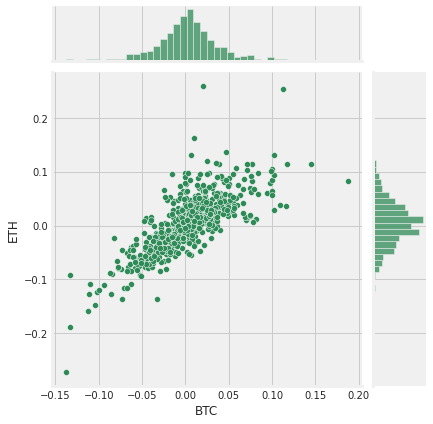

In [96]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='BTC', y='ETH', data=tech_rets, kind='scatter', color='seagreen')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

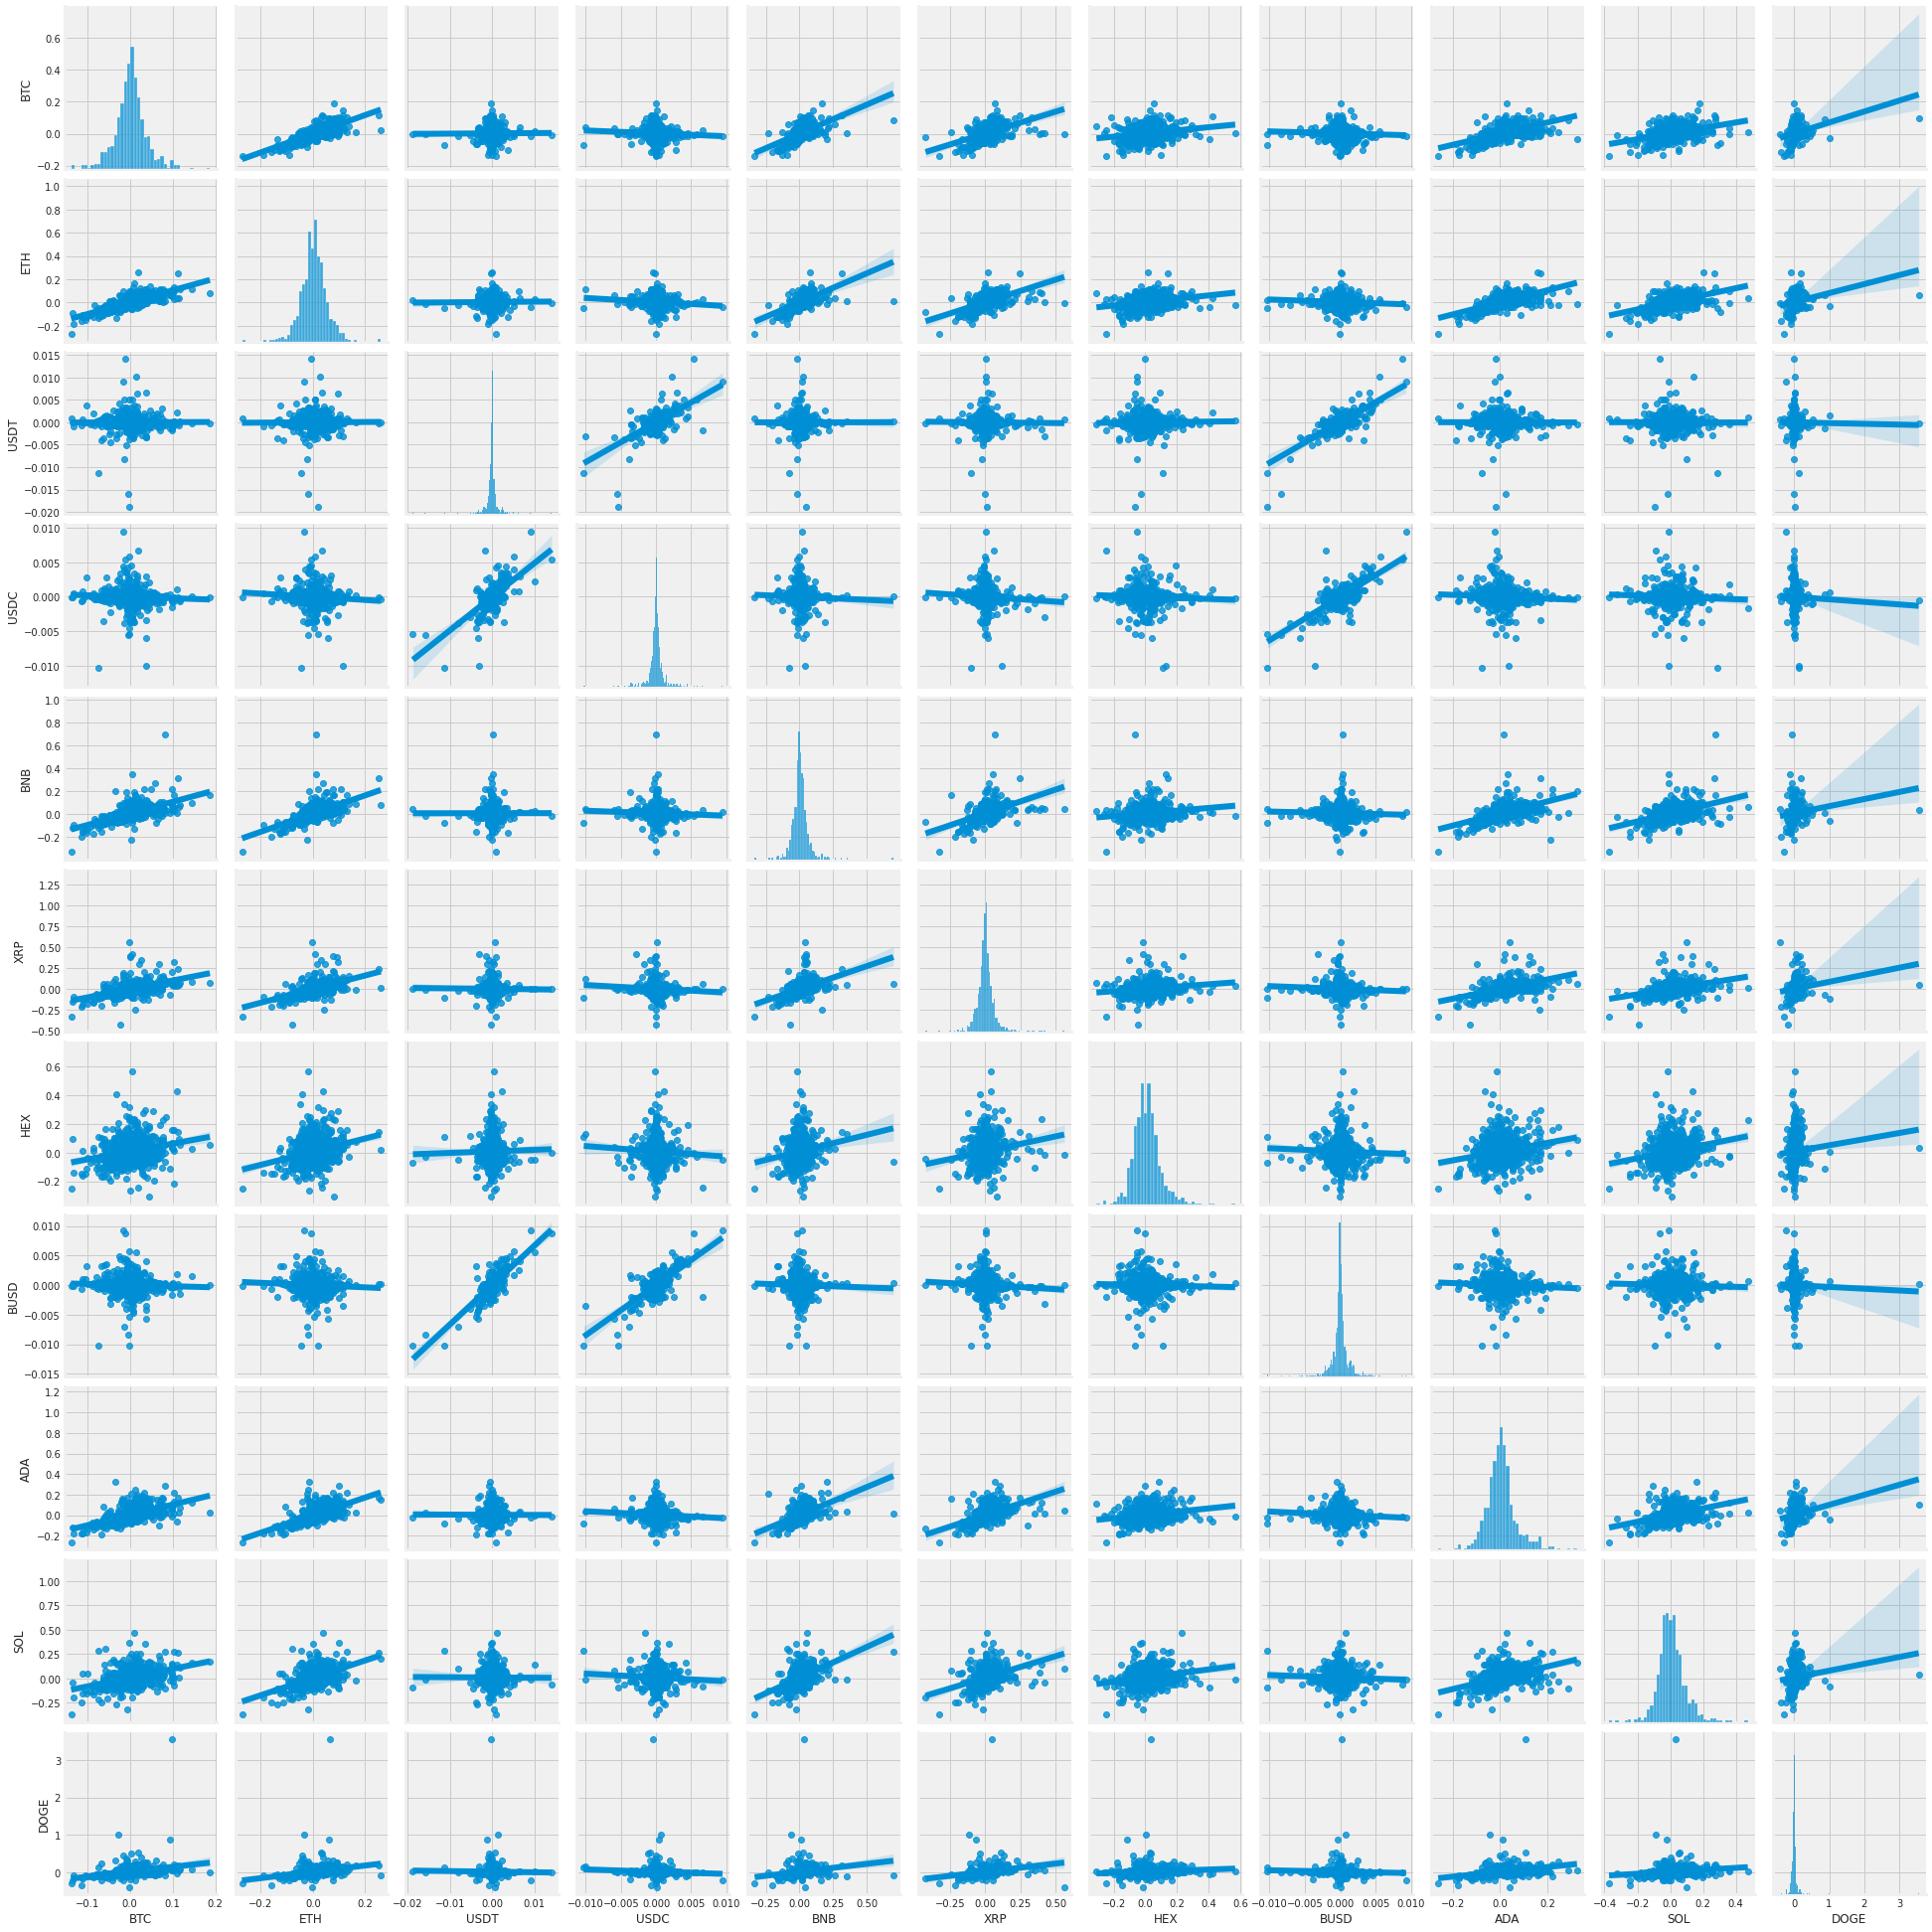

In [97]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

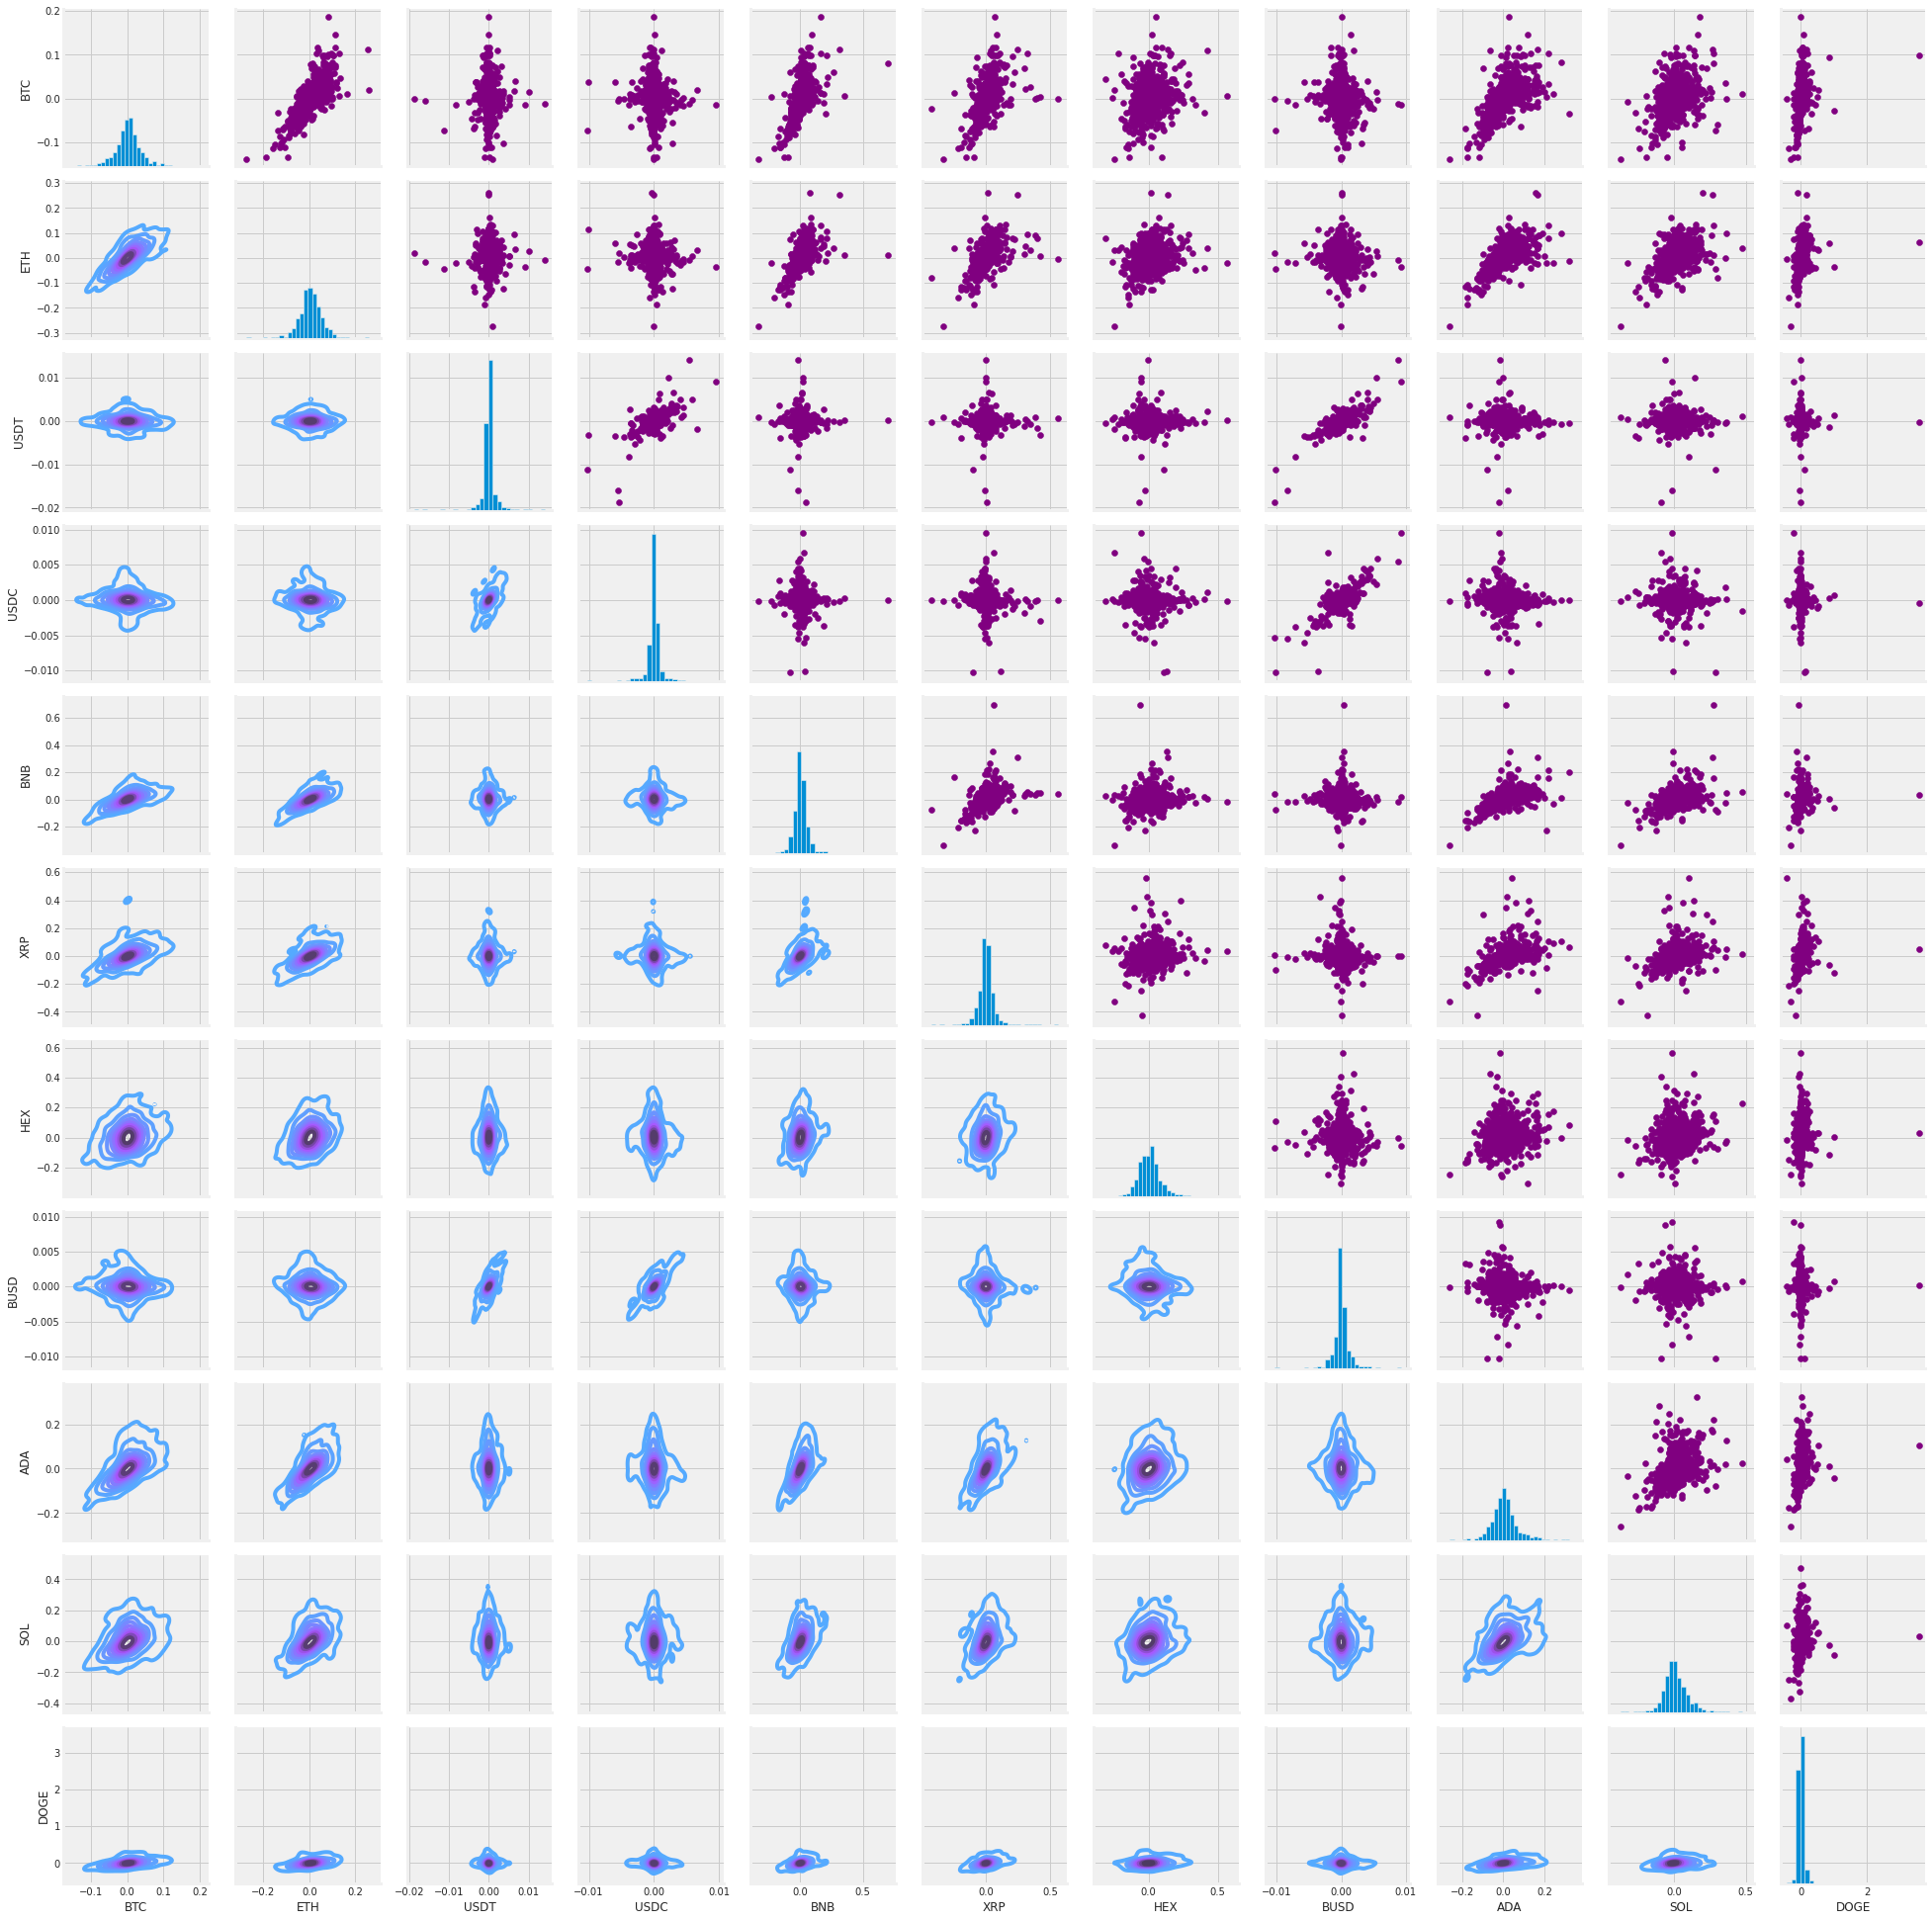

In [98]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

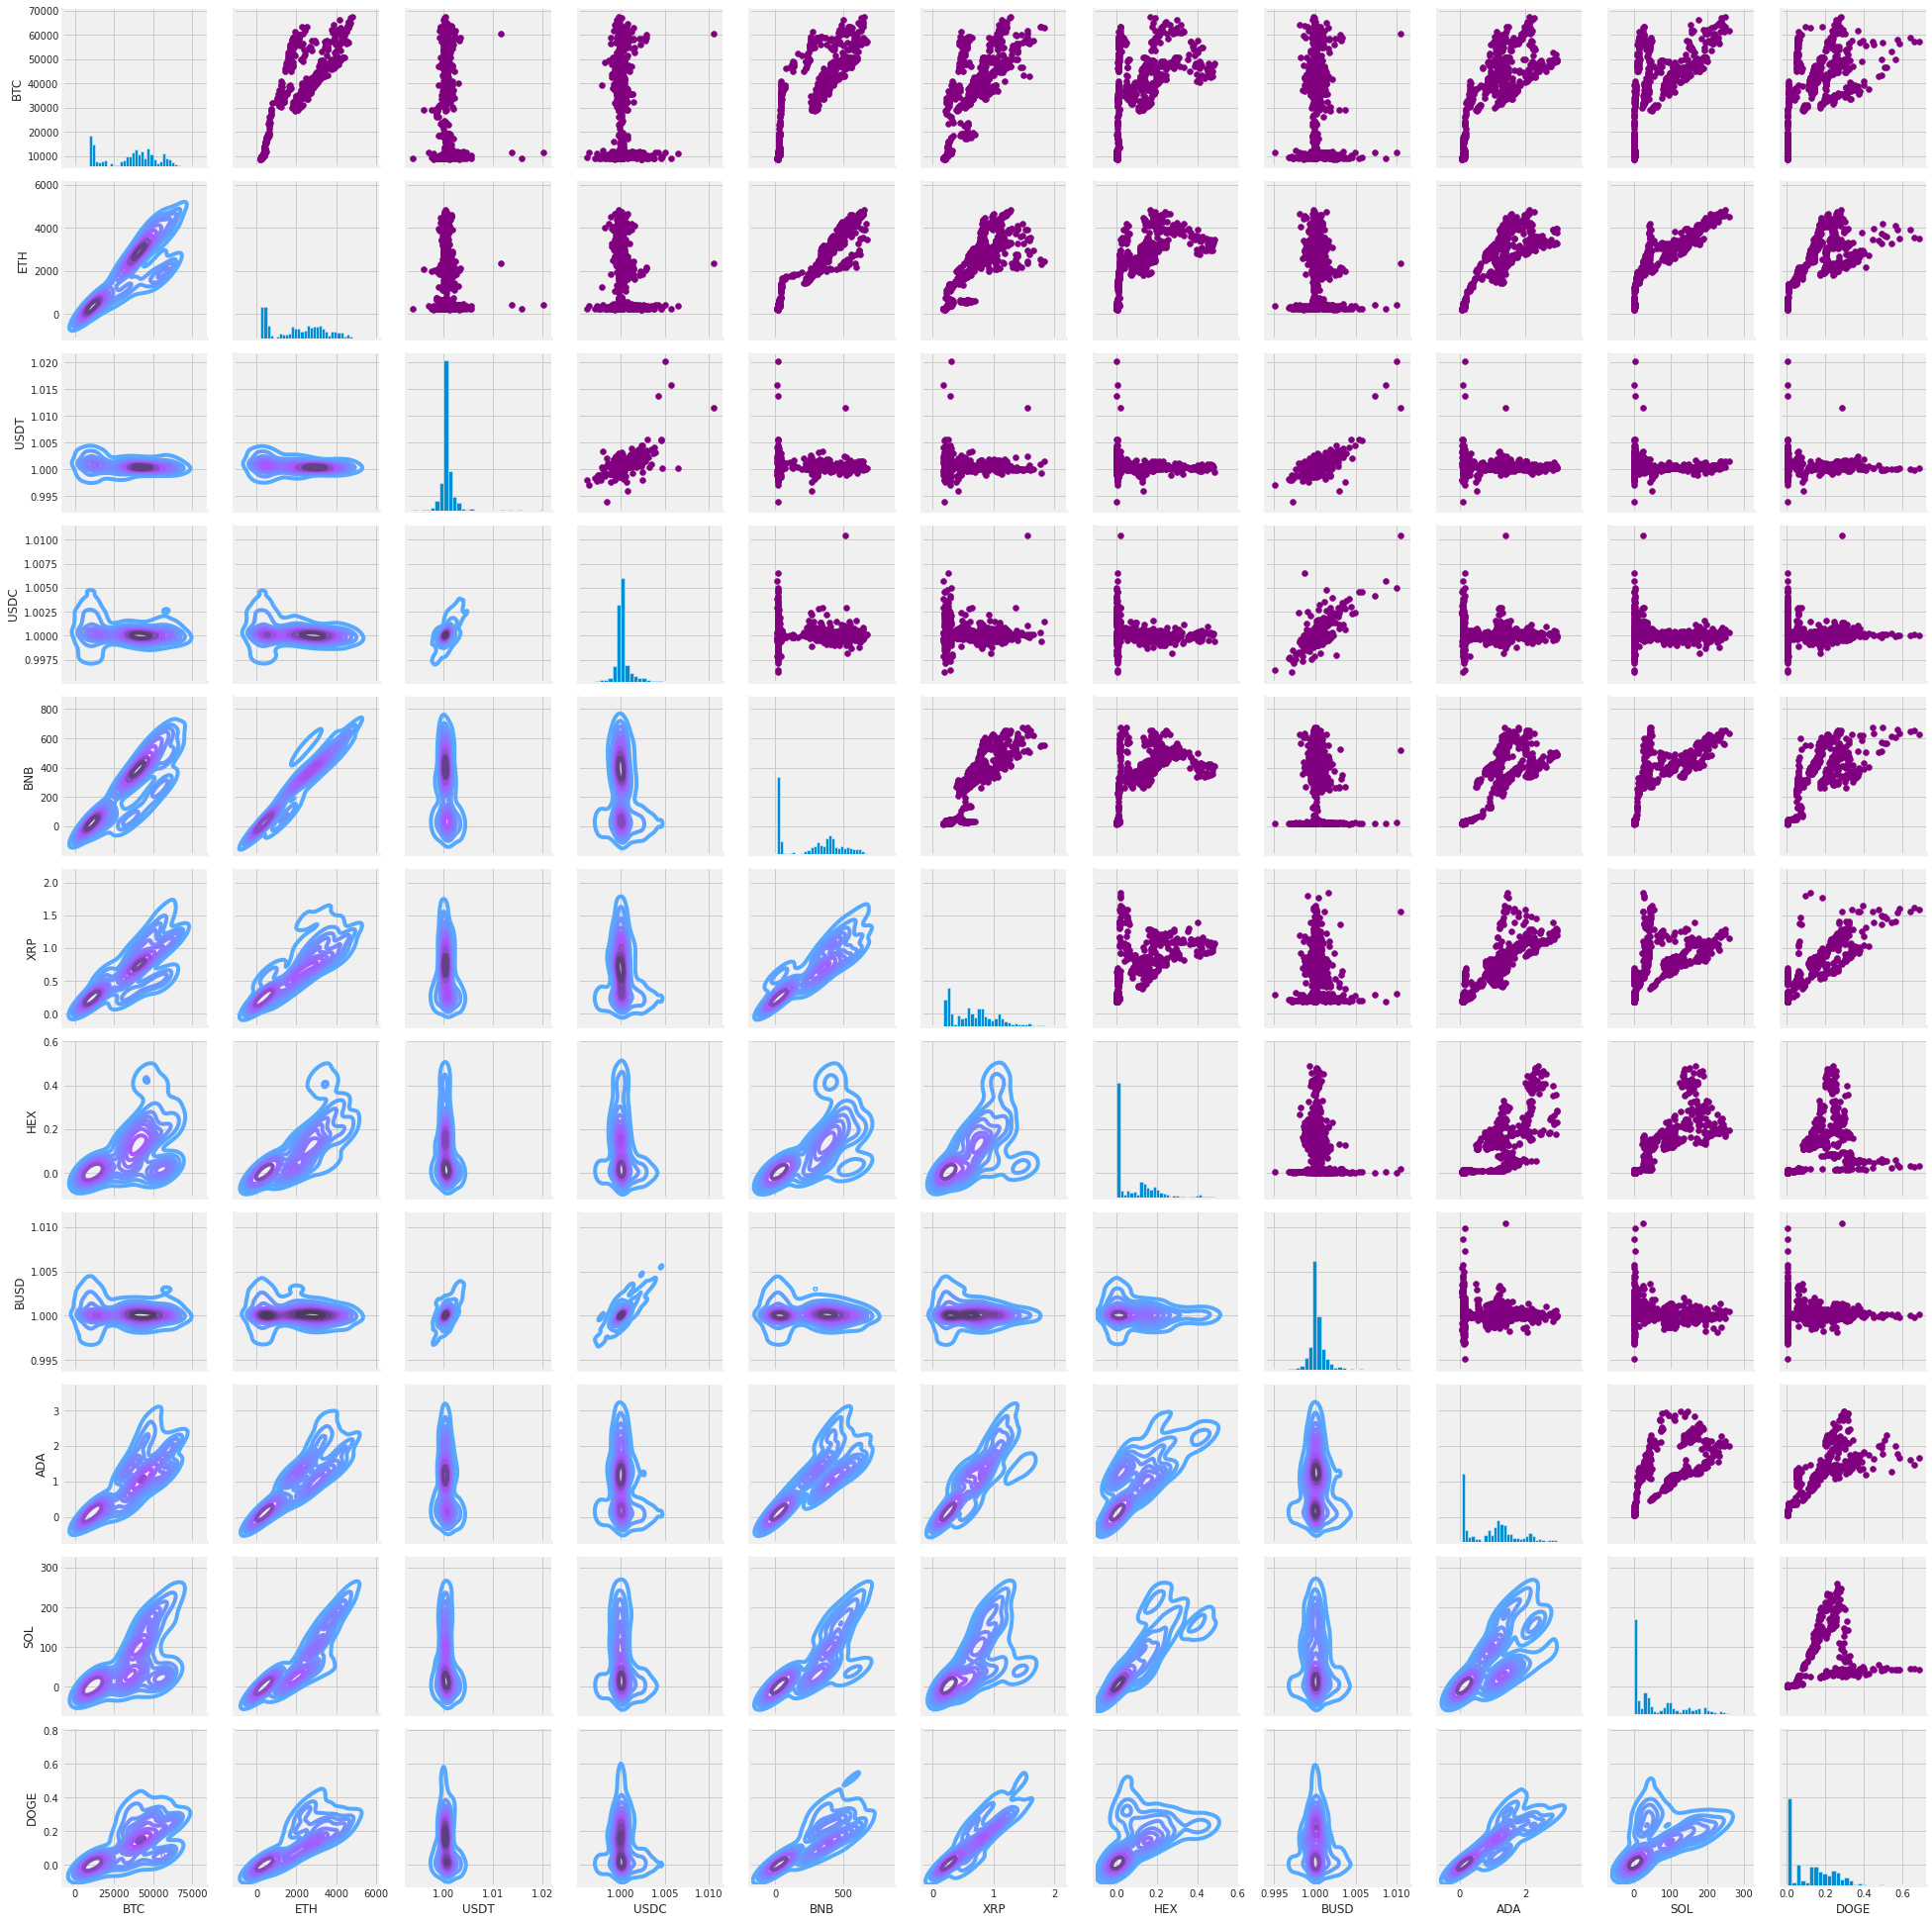

In [100]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

<AxesSubplot:>

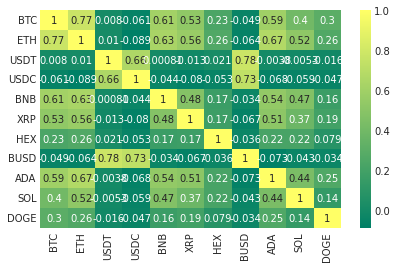

In [101]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:>

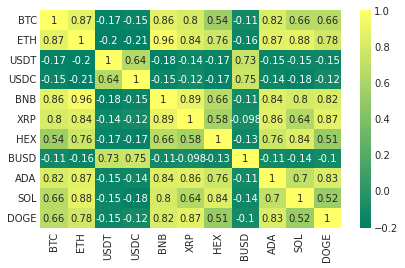

In [102]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

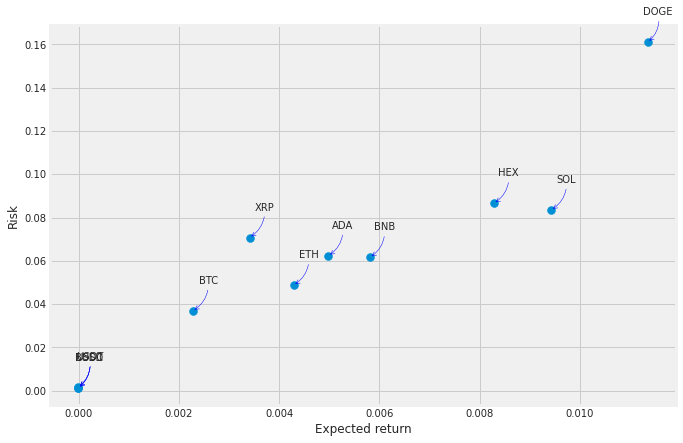

In [103]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

#for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
for label, x, y in zip(company_name, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(25, 25), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=-0.3'))
    

# 6. Predicting the closing price stock price of ... inc:

In [105]:
# Get the stock quote
df = DataReader('BTC-USD', data_source='yahoo', start='2020-05-22', end=datetime.now())   #2012-01-01 ,  2020-05-22
# Show teh data
df

High           Low          Open         Close  \
Date                                                                 
2020-05-22   9232.936523   9008.638672   9080.334961   9182.577148   
2020-05-23   9302.501953   9118.108398   9185.062500   9209.287109   
2020-05-24   9288.404297   8787.250977   9212.283203   8790.368164   
2020-05-25   8951.005859   8719.667969   8786.107422   8906.934570   
2020-05-26   8991.967773   8757.293945   8909.585938   8835.052734   
...                  ...           ...           ...           ...   
2022-05-17  30694.490234  29570.302734  29862.408203  30425.857422   
2022-05-18  30618.716797  28720.271484  30424.478516  28720.271484   
2022-05-19  30430.751953  28708.955078  28720.359375  30314.333984   
2022-05-20  30664.976562  28793.605469  30311.119141  29200.740234   
2022-05-21  29588.869141  29062.800781  29168.476562  29449.609375   

                 Volume     Adj Close  
Date                                   
2020-05-22  29810773699   9182.577148  
2020-05-23  27727866812   9209.287109  
2020-05-24  32518803300   8790.368164  
2020-05-25  31288157264   8906.934570  
2020-05-26  29584186947   8835.052734  
...                 ...           ...  
2022-05-17  29101473475  30425.857422  
2022-05-18  31285268319  28720.271484  
2022-05-19  33773447707  30314.333984  
2022-05-20  30749382605  29200.740234  
2022-05-21  17299251200  29449.609375  

[730 rows x 6 columns]

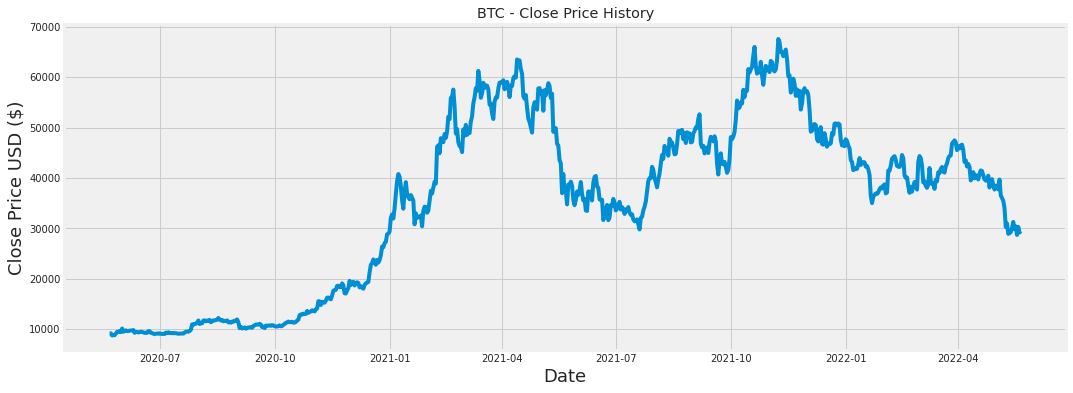

In [106]:
plt.figure(figsize=(16,6))
plt.title('BTC - Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [107]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

694

In [108]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print('Jumlah data=',len(scaled_data))
scaled_data[0:10]


Jumlah data= 730


array([[0.00667289],
       [0.00712733],
       [0.        ],
       [0.00198322],
       [0.00076025],
       [0.00664636],
       [0.01251152],
       [0.01103768],
       [0.01548317],
       [0.01141087]])

In [109]:
# Create the training data set 
# Create the scaled training data set
num_rows = 15
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(num_rows, len(train_data)):
    #print('data ',i-num_rows,'-',i)
    x_train.append(train_data[i-num_rows:i, 0])
    y_train.append(train_data[i, 0])
    if i<= num_rows+2:
        print('data ',i-num_rows,'-',i)
        print('x_train:',x_train[i-num_rows:i])
        print('y_train:',y_train[i-num_rows:i])
        print('')
    if (i == 100) | (i == 101) | (i == 102) :  # | (.5*len(train_data)+1 )):
        print('               ...')
        
    if i>= len(train_data)-2:
        print('data ',i-num_rows,'-',i)
        print('x_train:',x_train[i-num_rows:i])
        print('y_train:',y_train[i-num_rows:i])
        print('')
    
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

data  0 - 15
x_train: [array([0.00667289, 0.00712733, 0.        , 0.00198322, 0.00076025,
       0.00664636, 0.01251152, 0.01103768, 0.01548317, 0.01141087,
       0.02342605, 0.01258047, 0.01473974, 0.01718832, 0.01488972])]
y_train: [0.014688048991233105]

data  1 - 16
x_train: [array([0.00712733, 0.        , 0.00198322, 0.00076025, 0.00664636,
       0.01251152, 0.01103768, 0.01548317, 0.01141087, 0.02342605,
       0.01258047, 0.01473974, 0.01718832, 0.01488972, 0.01468805])]
y_train: [0.016477419287307365]

data  2 - 17
x_train: [array([0.        , 0.00198322, 0.00076025, 0.00664636, 0.01251152,
       0.01103768, 0.01548317, 0.01141087, 0.02342605, 0.01258047,
       0.01473974, 0.01718832, 0.01488972, 0.01468805, 0.01647742])]
y_train: [0.01669241554190315]

               ...
               ...
               ...
data  677 - 692
x_train: [array([0.65115007, 0.62522152, 0.6378621 , 0.63084066, 0.64078712,
       0.64366428, 0.62551613, 0.58554684, 0.59060174, 0.56991006,
       

## The previous cells created np arrays in which each element is an array with num_rolws # of elements

In [110]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=15)

2022-05-21 23:46:22.039217: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-05-21 23:46:22.724674: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
68/68 [==============================] - 6s 23ms/step - loss: 0.0199: 0s 
Epoch 2/15
68/68 [==============================] - 1s 21ms/step - loss: 0.0033
Epoch 3/15
68/68 [==============================] - 1s 22ms/step - loss: 0.0032
Epoch 4/15
68/68 [==============================] - 2s 22ms/step - loss: 0.0026
Epoch 5/15
68/68 [==============================] - 2s 22ms/step - loss: 0.0024
Epoch 6/15
68/68 [==============================] - 2s 23ms/step - loss: 0.0023
Epoch 7/15
68/68 [==============================] - 1s 22ms/step - loss: 0.0024
Epoch 8/15
68/68 [==============================] - 1s 22ms/step - loss: 0.0019
Epoch 9/15
68/68 [==============================] - 2s 33ms/step - loss: 0.0020
Epoch 10/15
68/68 [==============================] - 2s 23ms/step - loss: 0.0017
Epoch 11/15
68/68 [==============================] - 2s 23ms/step - loss: 0.0014
Epoch 12/15
68/68 [==============================] - 1s 22ms/step - loss: 0.0016
Epoch 13/15
68/68 [=============

In [111]:
# Create the testing data set
# Create a new array containing scaled values 

test_data = scaled_data[training_data_len - num_rows: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(num_rows, len(test_data)):
    x_test.append(test_data[i-num_rows:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [112]:
print(x_test.shape , y_test.shape)

(36, 15, 1) (36, 1)


In [113]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
mse = np.sqrt(np.mean(((predictions - y_test) )))

print('rmse:',rmse , ' ,  mse:',mse)

rmse: 2263.0905625945566  ,  mse: 42.096206519098736


In [114]:
print(len(predictions))
predictions

36


array([[41516.516],
       [41626.926],
       [41496.652],
       [41646.17 ],
       [42067.77 ],
       [42436.51 ],
       [42405.617],
       [41944.797],
       [41359.344],
       [40873.895],
       [40892.37 ],
       [40402.79 ],
       [40208.41 ],
       [40352.73 ],
       [40254.453],
       [39808.004],
       [39584.36 ],
       [39536.812],
       [39332.04 ],
       [39732.395],
       [39296.94 ],
       [38496.734],
       [37602.29 ],
       [36490.434],
       [34506.613],
       [32944.297],
       [31420.453],
       [30373.074],
       [29898.557],
       [30063.176],
       [30826.55 ],
       [31243.584],
       [31551.725],
       [31225.299],
       [31120.646],
       [30831.94 ]], dtype=float32)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


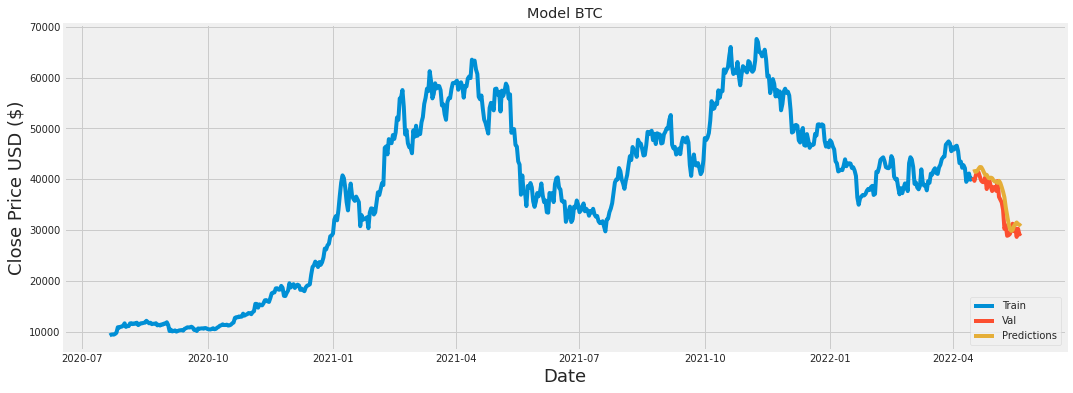

In [117]:
# Plot the data
train = data[60:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model BTC')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [116]:
# Show the valid and predicted prices
valid

Close   Predictions
Date                                  
2022-04-16  40424.484375  41516.515625
2022-04-17  39716.953125  41626.925781
2022-04-18  40826.214844  41496.652344
2022-04-19  41502.750000  41646.171875
2022-04-20  41374.378906  42067.769531
2022-04-21  40527.363281  42436.511719
2022-04-22  39740.320312  42405.617188
2022-04-23  39486.730469  41944.796875
2022-04-24  39469.292969  41359.343750
2022-04-25  40458.308594  40873.894531
2022-04-26  38117.460938  40892.371094
2022-04-27  39241.121094  40402.789062
2022-04-28  39773.828125  40208.410156
2022-04-29  38609.824219  40352.730469
2022-04-30  37714.875000  40254.453125
2022-05-01  38469.093750  39808.003906
2022-05-02  38529.328125  39584.359375
2022-05-03  37750.453125  39536.812500
2022-05-04  39698.371094  39332.039062
2022-05-05  36575.140625  39732.394531
2022-05-06  36040.921875  39296.941406
2022-05-07  35501.953125  38496.734375
2022-05-08  34059.265625  37602.289062
2022-05-09  30296.953125  36490.433594
2022-05-10  31022.906250  34506.613281
2022-05-11  28936.355469  32944.296875
2022-05-12  29047.751953  31420.453125
2022-05-13  29283.103516  30373.074219
2022-05-14  30101.265625  29898.556641
2022-05-15  31305.113281  30063.175781
2022-05-16  29862.917969  30826.550781
2022-05-17  30425.857422  31243.583984
2022-05-18  28720.271484  31551.724609
2022-05-19  30314.333984  31225.298828
2022-05-20  29200.740234  31120.646484
2022-05-21  29449.609375  30831.939453